In [287]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pickle as pck
import joblib as jlb
from scipy.stats import norm
from random import sample
from sklearn.ensemble import IsolationForest 
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_regression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import roc_auc_score, roc_curve, auc
from sklearn.preprocessing   import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Lectura de datos

In [288]:
df = pd.read_csv('datos.csv')

# Analisis de Datos

In [289]:
df.shape

(284807, 36)

In [290]:
df.head()

transaction_id  timestamp  amount  \
0  99899e9e02c4b41fc442744220e6fa12f8d36b26f70027...   155270.0   12.00   
1  d678605da2ed45d14c95228b2e6a0daa1c635c7c5d3f7c...    46054.0  208.89   
2  5f178ebbecf592c3ea98b5b26ff3547f8a40e88aa428d5...   167866.0    1.00   
3  455543a8012484e430efd18300186319bf8da376811333...   163539.0   15.00   
4  d8637ef4c5c833fee92149b5b8ef2fad601196be9b7c89...   153872.0    0.01   

   variable_01  variable_02  variable_03  variable_04  variable_05  \
0    -0.071330    -0.032900     0.109989     0.339889    -0.626131   
1     0.057858     0.003669     0.076745     0.392782     0.458835   
2    -0.002449     0.019520    -0.038565     0.400659    -1.214922   
3    -0.039202    -0.031762    -0.328682    -0.045094     0.606368   
4    -0.058206    -0.051926     0.653525    -0.387901     0.806301   

   variable_06  variable_07  variable_08  variable_09  variable_10  \
0    -0.116853     1.220826     0.394041     0.051705     0.700084   
1    -0.279094     0.435257     0.230350     0.292049     0.624199   
2    -0.177434     0.303247     0.030461    -0.112687    -0.307426   
3     0.204822     0.014322     0.013439     0.016800     0.861519   
4     0.227390     0.676840     0.209482    -0.206405     0.367224   

   variable_11  variable_12  variable_13  variable_14  variable_15  \
0    -1.185263    -0.183050     1.051029     0.267423    -0.220569   
1     0.327219    -0.032708    -0.372193     1.440826    -0.049183   
2     1.595186     1.385215     1.068869     1.133506    -2.619782   
3    -0.891606     1.139910     1.179129    -0.795164    -1.056983   
4     0.721541    -0.713888     0.496167     0.629590     0.325217   

   variable_16  variable_17  variable_18  variable_19  variable_20  \
0     1.358207    -0.321922    -1.121246     0.852400    -0.635935   
1    -0.595081     0.376050    -0.518996    -1.245331     2.034140   
2     0.277352    -0.512077    -0.713025    -1.201109     0.561721   
3    -0.142009    -0.026496     1.408220     0.446607    -0.791305   
4    -0.947716     0.513088     0.854643    -0.175665     1.449330   

   variable_21  variable_22  variable_23  variable_24  variable_25  \
0    -0.445327    -0.251412    -0.989219    -0.168169    -1.054944   
1    -0.073293    -0.439827    -0.863551    -1.606923    -1.100937   
2    -0.351699     0.362076    -1.215083     1.044934     0.533274   
3    -0.159512    -0.300838    -0.787018     0.020468    -0.853713   
4     0.141885    -0.854064    -0.347373    -0.750013    -0.914675   

   variable_26  variable_27  variable_28  variable_29  variable_30  \
0    -1.603176    -0.616640     2.283078     0.373964     1.576543   
1     0.597263    -1.228029     0.875399     0.260934    -0.558290   
2    -2.802382     0.570268     2.121604    -0.131120     1.603304   
3    -1.915028    -0.478400     2.161957    -1.117518     1.768693   
4    -0.595874    -0.705751     2.026529     2.221984     0.744251   

   variable_31  variable_32  is_fraud  
0    -0.941557    -0.105280         0  
1     0.763729     0.011740         0  
2    -0.032323     0.062465         0  
3    -0.517470    -0.101639         0  
4    -0.768323    -0.166163         0

In [291]:
df.isnull().sum() # Podemos ver que aparentemente no hay valores nulos

transaction_id    0
timestamp         0
amount            0
variable_01       0
variable_02       0
variable_03       0
variable_04       0
variable_05       0
variable_06       0
variable_07       0
variable_08       0
variable_09       0
variable_10       0
variable_11       0
variable_12       0
variable_13       0
variable_14       0
variable_15       0
variable_16       0
variable_17       0
variable_18       0
variable_19       0
variable_20       0
variable_21       0
variable_22       0
variable_23       0
variable_24       0
variable_25       0
variable_26       0
variable_27       0
variable_28       0
variable_29       0
variable_30       0
variable_31       0
variable_32       0
is_fraud          0
dtype: int64

In [292]:
porcent = (df['is_fraud'].value_counts())/(len(df))*100 # El datatset esta desbalanceado por lo que procedemos a hacer 
porcent                                                 # Oversampling y subsampling

is_fraud
0    99.827251
1     0.172749
Name: count, dtype: float64

In [293]:
df.info() # Todos los datos tienen valores numericos a excepcion de transaction_id

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 36 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   transaction_id  284807 non-null  object 
 1   timestamp       284807 non-null  float64
 2   amount          284807 non-null  float64
 3   variable_01     284807 non-null  float64
 4   variable_02     284807 non-null  float64
 5   variable_03     284807 non-null  float64
 6   variable_04     284807 non-null  float64
 7   variable_05     284807 non-null  float64
 8   variable_06     284807 non-null  float64
 9   variable_07     284807 non-null  float64
 10  variable_08     284807 non-null  float64
 11  variable_09     284807 non-null  float64
 12  variable_10     284807 non-null  float64
 13  variable_11     284807 non-null  float64
 14  variable_12     284807 non-null  float64
 15  variable_13     284807 non-null  float64
 16  variable_14     284807 non-null  float64
 17  variable_1

In [294]:
pd.set_option('display.max_column',None)
df.describe(percentiles=[0.01,.25,.50,.75,.99]) # Buscamos si hay outliers, al parecer hay
                                                # un valor muy grande en amount

timestamp         amount   variable_01   variable_02   variable_03  \
count  284807.000000  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575      88.349619 -1.247286e-16 -3.675372e-16  1.687909e-15   
std     47488.145955     250.120109  3.300833e-01  4.036325e-01  4.822270e-01   
min         0.000000       0.000000 -1.543008e+01 -2.256568e+01 -2.604551e+00   
1%       2422.000000       0.120000 -8.762654e-01 -1.247746e+00 -1.009384e+00   
25%     54201.500000       5.600000 -5.295979e-02 -7.083953e-02 -3.269839e-01   
50%     84692.000000      22.000000  1.124383e-02  1.342146e-03 -5.213911e-02   
75%    139320.500000      77.165000  7.827995e-02  9.104512e-02  2.409522e-01   
99%    170560.940000    1017.970000  5.411264e-01  9.313604e-01  1.158698e+00   
max    172792.000000   25691.160000  3.384781e+01  3.161220e+01  3.517346e+00   

        variable_04   variable_05   variable_06   variable_07   variable_08  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   5.135217e-16  4.471943e-15  2.633534e-16 -3.505225e-16  1.626624e-16   
std    5.212781e-01  6.056471e-01  6.244603e-01  7.257016e-01  7.345240e-01   
min   -1.029540e+01 -2.836627e+00 -4.480774e+01 -1.093314e+01 -3.483038e+01   
1%    -1.420859e+00 -1.657308e+00 -1.193417e+00 -1.654625e+00 -1.469679e+00   
25%   -3.171451e-01 -3.545861e-01 -1.618463e-01 -5.423504e-01 -2.283949e-01   
50%    1.659350e-02  4.097606e-02 -1.119293e-02  6.781943e-03 -2.945017e-02   
75%    3.507156e-01  4.395266e-01  1.476421e-01  5.285536e-01  1.863772e-01   
99%    1.203955e+00  1.063748e+00  1.508703e+00  1.530152e+00  1.931852e+00   
max    7.519589e+00  4.584549e+00  2.252841e+01  1.050309e+01  2.720284e+01   

        variable_09   variable_10   variable_11   variable_12   variable_13  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   6.452607e-16  1.037596e-15  9.708849e-16 -3.755206e-16  1.434136e-15   
std    7.709250e-01  8.140405e-01  8.381762e-01  8.493371e-01  8.762529e-01   
min   -5.449772e+01 -7.213527e+00 -9.498746e+00 -2.516280e+01 -1.412985e+01   
1%    -1.568406e+00 -2.075516e+00 -2.147067e+00 -1.349962e+00 -2.381823e+00   
25%   -2.117214e-01 -4.562989e-01 -4.988498e-01 -4.837483e-01 -4.680368e-01   
50%   -6.248109e-02  3.734823e-03 -3.636312e-03 -6.567575e-02  6.641332e-02   
75%    1.330408e-01  4.589494e-01  5.008067e-01  3.996750e-01  5.232963e-01   
99%    2.412190e+00  2.262924e+00  2.068689e+00  2.289928e+00  1.874820e+00   
max    3.942090e+01  5.591971e+00  5.041069e+00  9.253526e+00  1.731511e+01   

        variable_14   variable_15   variable_16   variable_17   variable_18  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   4.887206e-15  1.210587e-15  8.243889e-16 -1.247361e-15  1.699373e-15   
std    9.153160e-01  9.585956e-01  9.952742e-01  9.992014e-01  1.020713e+00   
min   -4.498945e+00 -1.921433e+01 -5.791881e+00 -1.868371e+01 -4.797473e+00   
1%    -2.383923e+00 -2.799763e+00 -2.283101e+00 -3.063938e+00 -2.093086e+00   
25%   -5.828843e-01 -4.255740e-01 -6.485393e-01 -4.055715e-01 -7.624942e-01   
50%    4.807155e-02  5.060132e-02 -1.356806e-02  1.400326e-01 -3.275735e-02   
75%    6.488208e-01  4.931498e-01  6.625050e-01  6.182380e-01  7.395934e-01   
99%    1.925527e+00  2.150300e+00  2.513962e+00  1.698576e+00  2.290583e+00   
max    8.877742e+00  1.052677e+01  7.126883e+00  7.848392e+00  1.201891e+01   

        variable_19   variable_20   variable_21   variable_22   variable_23  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   2.236932e-15 -2.411096e-15  1.147618e-16 -5.633807e-16  1.497617e-15   
std    1.088850e+00  1.098632e+00  1.194353e+00  1.237094e+00  1.332271e+00   
min   -2.458826e+01 -1.343407e+01 -7.321672e+01 -4.355724e+01 -2.616051e+01   
1%    -2.092670e+00 -2.455288e+00 -4.033899e+00 -3.012847e+00 -2.124023e+00   
25%   -5.354257e-01 -6.430976e-01 -

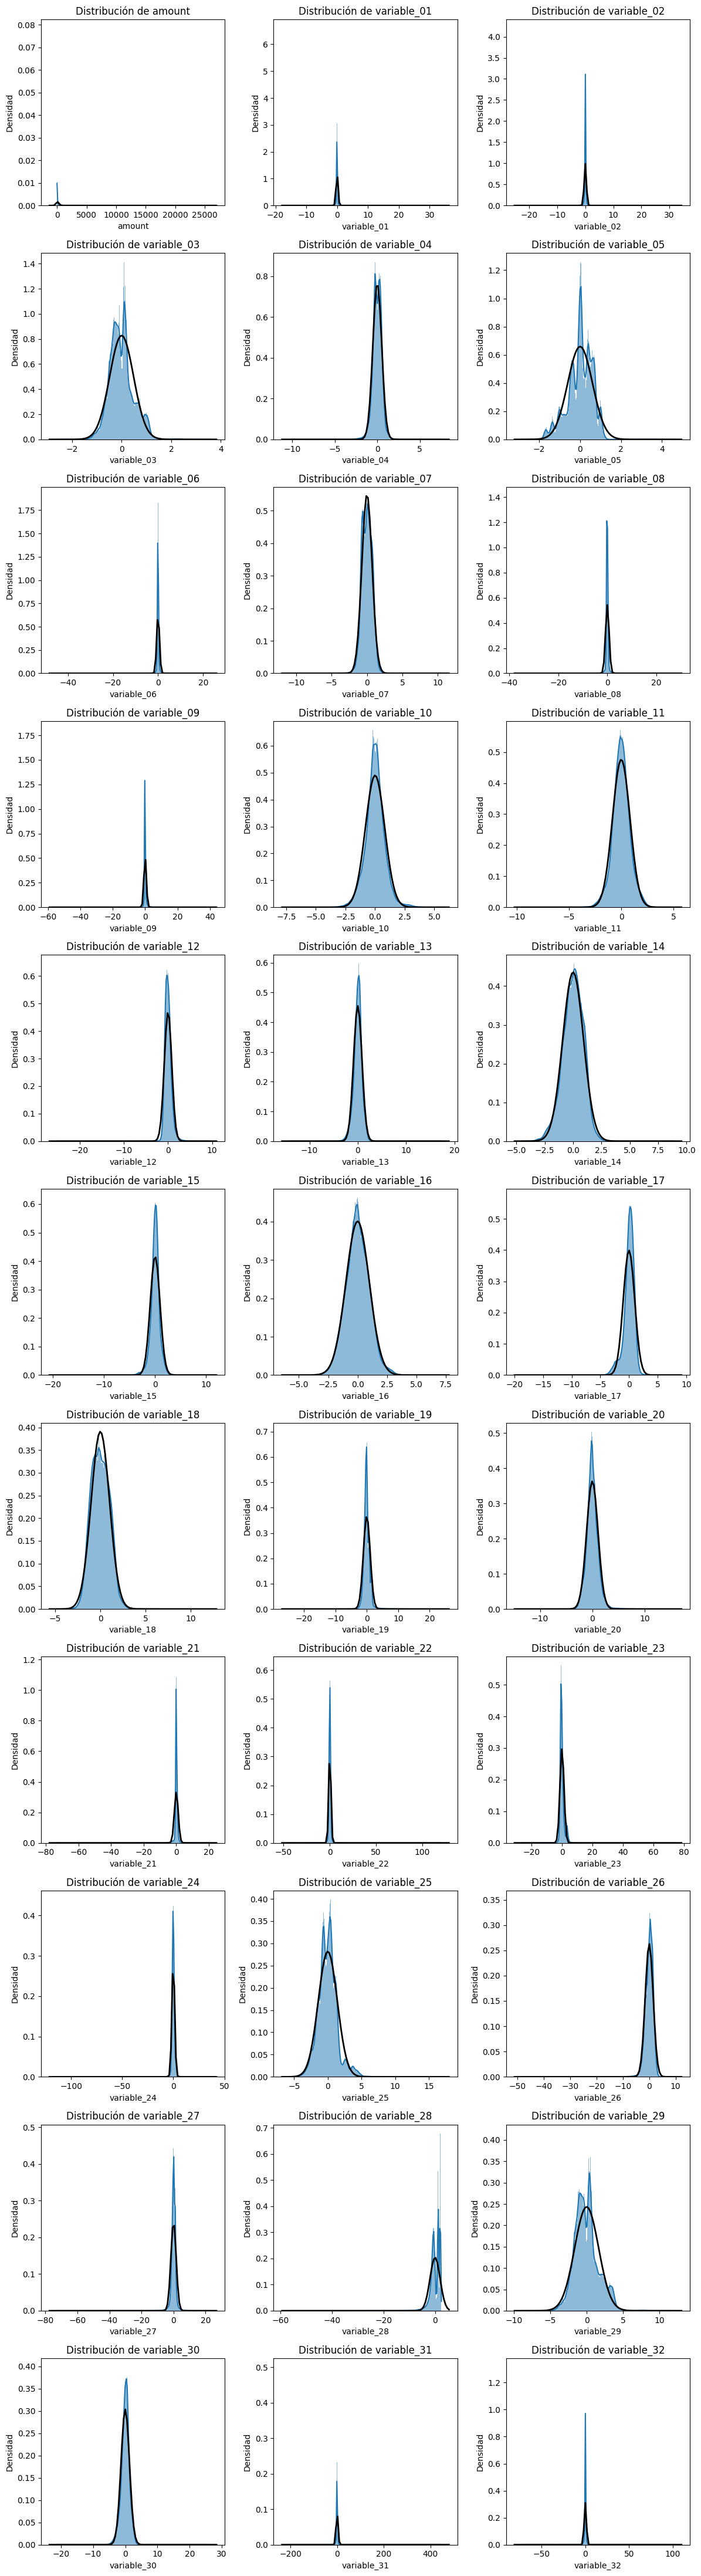

In [295]:
# Solo tenemos columnas continuas por lo que simplemente vamos a separar el transaction id, timestamp y la variable objetivo
list_descart = ['transaction_id','is_fraud','timestamp']
df_column_cont = df.drop(columns = list_descart)
list_column = df_column_cont.columns

num_var = len(list_column)
cols = 3
rows = (num_var // cols) + (num_var % cols > 0)
plt.figure(figsize=(cols * 4, rows * 4))

for i, var in enumerate(list_column, 1):
    plt.subplot(rows, cols, i)  
    sns.histplot(df[var], kde=True, stat="density", linewidth=0)
    
    # Ajustar la distribución normal
    mu, std = norm.fit(df[var].dropna())  # Eliminar NaN para el ajuste a pesar de que comprobamos que no hay anteriormente
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    
    # Título y etiquetas
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Densidad')

plt.tight_layout()
plt.show() # Podemos ver que algunas graficas tienenen una escala en los ejes muy grande, esto puedes ser por los outliers


In [296]:
df_iso = df[list_column].copy()
iso_forest = IsolationForest(n_estimators = 100, contamination = 0.5 ,random_state = 42)
df_iso['outlier_score'] = iso_forest.fit_predict(df_iso)
df['outlier_score'] = df_iso['outlier_score']
df_sin_out = df[df['outlier_score'] == 1]

In [297]:
df_sin_out.describe(percentiles=[0.01,.25,.50,.75,.99])

timestamp         amount    variable_01    variable_02  \
count  142404.000000  142404.000000  142404.000000  142404.000000   
mean    94478.275442      39.272294       0.014652       0.018609   
std     46804.894640      58.967235       0.086561       0.134804   
min         0.000000       0.000000      -0.559356      -1.051851   
1%       1864.240000       0.310000      -0.215692      -0.359519   
25%     54466.750000       3.590000      -0.040490      -0.050263   
50%     80068.000000      15.000000       0.012381      -0.000448   
75%    139934.000000      49.950000       0.050549       0.060997   
99%    170649.940000     288.410700       0.257821       0.392339   
max    172792.000000     602.550000       0.786468       0.813084   

         variable_03    variable_04    variable_05    variable_06  \
count  142404.000000  142404.000000  142404.000000  142404.000000   
mean        0.009312       0.026413       0.030578       0.005950   
std         0.390054       0.413180       0.515331       0.192758   
min        -1.159936      -2.627421      -2.385630      -1.227113   
1%         -0.731955      -0.946321      -1.398928      -0.452157   
25%        -0.277402      -0.277334      -0.297701      -0.117043   
50%         0.005845       0.024006       0.046744      -0.002379   
75%         0.201396       0.338624       0.403810       0.122394   
99%         1.055741       0.885242       1.023323       0.455269   
max         1.559771       2.178768       4.016342       1.854719   

         variable_07    variable_08    variable_09    variable_10  \
count  142404.000000  142404.000000  142404.000000  142404.000000   
mean       -0.052402      -0.030454      -0.047034       0.065751   
std         0.621903       0.233029       0.194244       0.567254   
min        -2.367898      -1.667542      -1.125049      -2.671437   
1%         -1.297534      -0.451980      -0.450575      -1.301936   
25%        -0.577542      -0.216654      -0.174768      -0.274689   
50%        -0.071209      -0.044852      -0.069418       0.058883   
75%         0.409845       0.136968       0.064065       0.407388   
99%         1.302512       0.496805       0.521524       1.479739   
max         2.252002       1.695489       1.042874       4.175778   

         variable_11    variable_12    variable_13    variable_14  \
count  142404.000000  142404.000000  142404.000000  142404.000000   
mean       -0.102178      -0.130977       0.147968       0.127464   
std         0.638696       0.525020       0.558418       0.734836   
min        -3.357679      -1.770077      -2.917271      -3.586617   
1%         -1.786365      -1.145785      -1.228043      -1.537820   
25%        -0.507329      -0.521391      -0.199916      -0.394453   
50%        -0.087387      -0.172619       0.156982       0.141381   
75%         0.325339       0.225807       0.491182       0.678742   
99%         1.320433       1.231187       1.534826       1.640182   
max         2.791442       2.417819       2.401279       2.819586   

         variable_15    variable_16    variable_17    variable_18  \
count  142404.000000  142404.000000  142404.000000  142404.000000   
mean       -0.013445      -0.084059       0.215194      -0.018076   
std         0.604342       0.908789       0.645697       0.929955   
min        -2.845698      -4.008640      -3.590679      -2.716111   
1%         -1.651601      -2.254928      -1.596875      -1.824323   
25%        -0.369557      -0.690198      -0.175423      -0.776169   
50%         0.042642      -0.057874       0.258599      -0.062814   
75%         0.398999       0.573112       0.663032       0.735394   
99%         1.268501       1.771401       1.490042       1.826373   
max         2.550348       3.693197       2.199661       2.959124   

         variable_19    variable_20    variable_21    variable_22  \
count  142404.000000  142404.000000  142404.000000  142404.000000   
mean       -0.072466      -0.048214       0.037543       0.071487   
std 

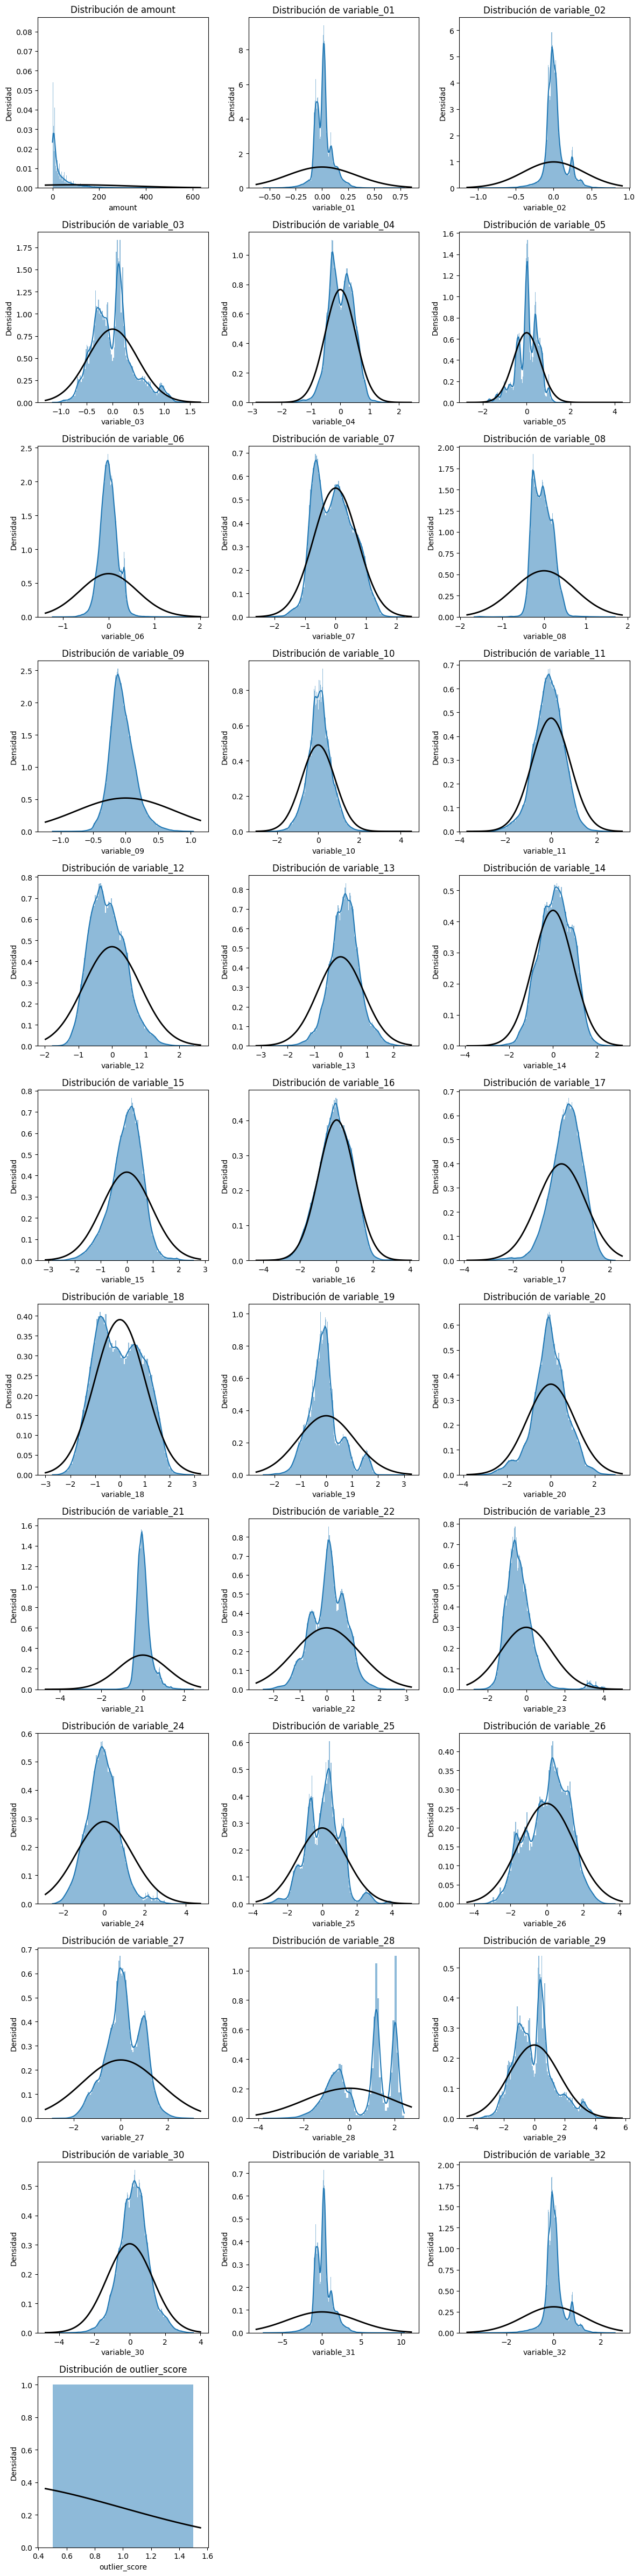

In [298]:
list_descart = ['transaction_id','is_fraud','timestamp']
df_column_cont = df.drop(columns = list_descart)
list_column = df_column_cont.columns

num_var = len(list_column)
cols = 3
rows = (num_var // cols) + (num_var % cols > 0)
plt.figure(figsize=(cols * 4, rows * 4))
for i, var in enumerate(list_column, 1):
    plt.subplot(rows, cols, i)  
    sns.histplot(df_sin_out[var], kde=True, stat="density", linewidth=0)
    
    mu, std = norm.fit(df[var].dropna())  
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Densidad')

plt.tight_layout()
plt.show() # Al aplicar isolation forest se pueden ver algunas caractersitcas que quedaron mucho mejor, sin embargo hay otras que aun 
           # siguen teniendo outliers drasticos. Por lo que vamos a hacer otro tratamiento de outliers 

In [299]:
column_quantile = ['variable_01','variable_02','variable_04','variable_05','variable_06','variable_08','variable_09','variable_10','variable_11','variable_21','variable_22','variable_31','variable_32']
# Columnas a las que vamos a quitar los percentuiles extremos

In [300]:
for var in column_quantile:
    lower = df_sin_out[var].quantile(0.005)
    upper = df_sin_out[var].quantile(0.995)
    df_sin_out = df_sin_out[(df_sin_out[var] >= lower) & (df_sin_out[var] <= upper)]

In [301]:
df_sin_out.describe(percentiles=[0.01,.25,.50,.75,.99])

timestamp         amount    variable_01    variable_02  \
count  124952.000000  124952.000000  124952.000000  124952.000000   
mean    93766.805933      37.570249       0.013108       0.019404   
std     46726.668408      54.126870       0.071832       0.112271   
min         0.000000       0.000000      -0.209265      -0.329118   
1%       1935.000000       0.230000      -0.155909      -0.239017   
25%     54110.750000       3.480000      -0.039248      -0.046869   
50%     79417.000000      14.980000       0.012022      -0.001190   
75%    139341.500000      49.560000       0.043923       0.055488   
99%    170627.000000     259.414500       0.208316       0.346533   
max    172792.000000     457.500000       0.250998       0.380060   

         variable_03    variable_04    variable_05    variable_06  \
count  124952.000000  124952.000000  124952.000000  124952.000000   
mean        0.010318       0.042315       0.035933       0.008159   
std         0.396953       0.390144       0.495145       0.174173   
min        -1.159936      -1.114362      -1.627417      -0.479537   
1%         -0.745111      -0.827145      -1.340585      -0.379495   
25%        -0.284108      -0.264945      -0.291010      -0.109647   
50%         0.015419       0.048251       0.049513      -0.000833   
75%         0.202203       0.347620       0.404183       0.118302   
99%         1.065183       0.842365       1.003469       0.404942   
max         1.559771       0.968648       1.076700       0.529972   

         variable_07    variable_08    variable_09    variable_10  \
count  124952.000000  124952.000000  124952.000000  124952.000000   
mean       -0.067380      -0.037475      -0.051042       0.063274   
std         0.610309       0.215940       0.174897       0.532255   
min        -1.858913      -0.502850      -0.475425      -1.445108   
1%         -1.239319      -0.421864      -0.407144      -1.214203   
25%        -0.589866      -0.221006      -0.171438      -0.264199   
50%        -0.085984      -0.051372      -0.071338       0.058763   
75%         0.386461       0.125406       0.055320       0.401011   
99%         1.268118       0.457434       0.440041       1.337810   
max         1.767294       0.555254       0.571786       1.656437   

         variable_11    variable_12    variable_13    variable_14  \
count  124952.000000  124952.000000  124952.000000  124952.000000   
mean       -0.114716      -0.135651       0.168964       0.129626   
std         0.607580       0.525460       0.544084       0.737776   
min        -1.998971      -1.770077      -2.917271      -3.586617   
1%         -1.672225      -1.150205      -1.124350      -1.544820   
25%        -0.512366      -0.525924      -0.179204      -0.394105   
50%        -0.100057      -0.177947       0.170464       0.145250   
75%         0.306057       0.219068       0.497731       0.685410   
99%         1.192799       1.239551       1.552129       1.634661   
max         1.464259       2.417819       2.401279       2.819586   

         variable_15    variable_16    variable_17    variable_18  \
count  124952.000000  124952.000000  124952.000000  124952.000000   
mean       -0.009029      -0.091870       0.228774       0.002272   
std         0.598093       0.916227       0.654885       0.937710   
min        -2.845698      -4.008640      -3.590679      -2.716111   
1%         -1.635740      -2.267438      -1.665120      -1.824552   
25%        -0.361237      -0.703479      -0.164709      -0.767207   
50%         0.044640      -0.065769       0.275846      -0.035336   
75%         0.396867       0.570190       0.683725       0.767612   
99%         1.281026       1.786302       1.507755       1.838934   
max         2.550348       3.693197       2.199661       2.959124   

         variable_19    variable_20    variable_21    variable_22  \
count  124952.000000  124952.000000  124952.000000  124952.000000   
mean       -0.077841      -0.018391       0.039671       0.043006   
std 

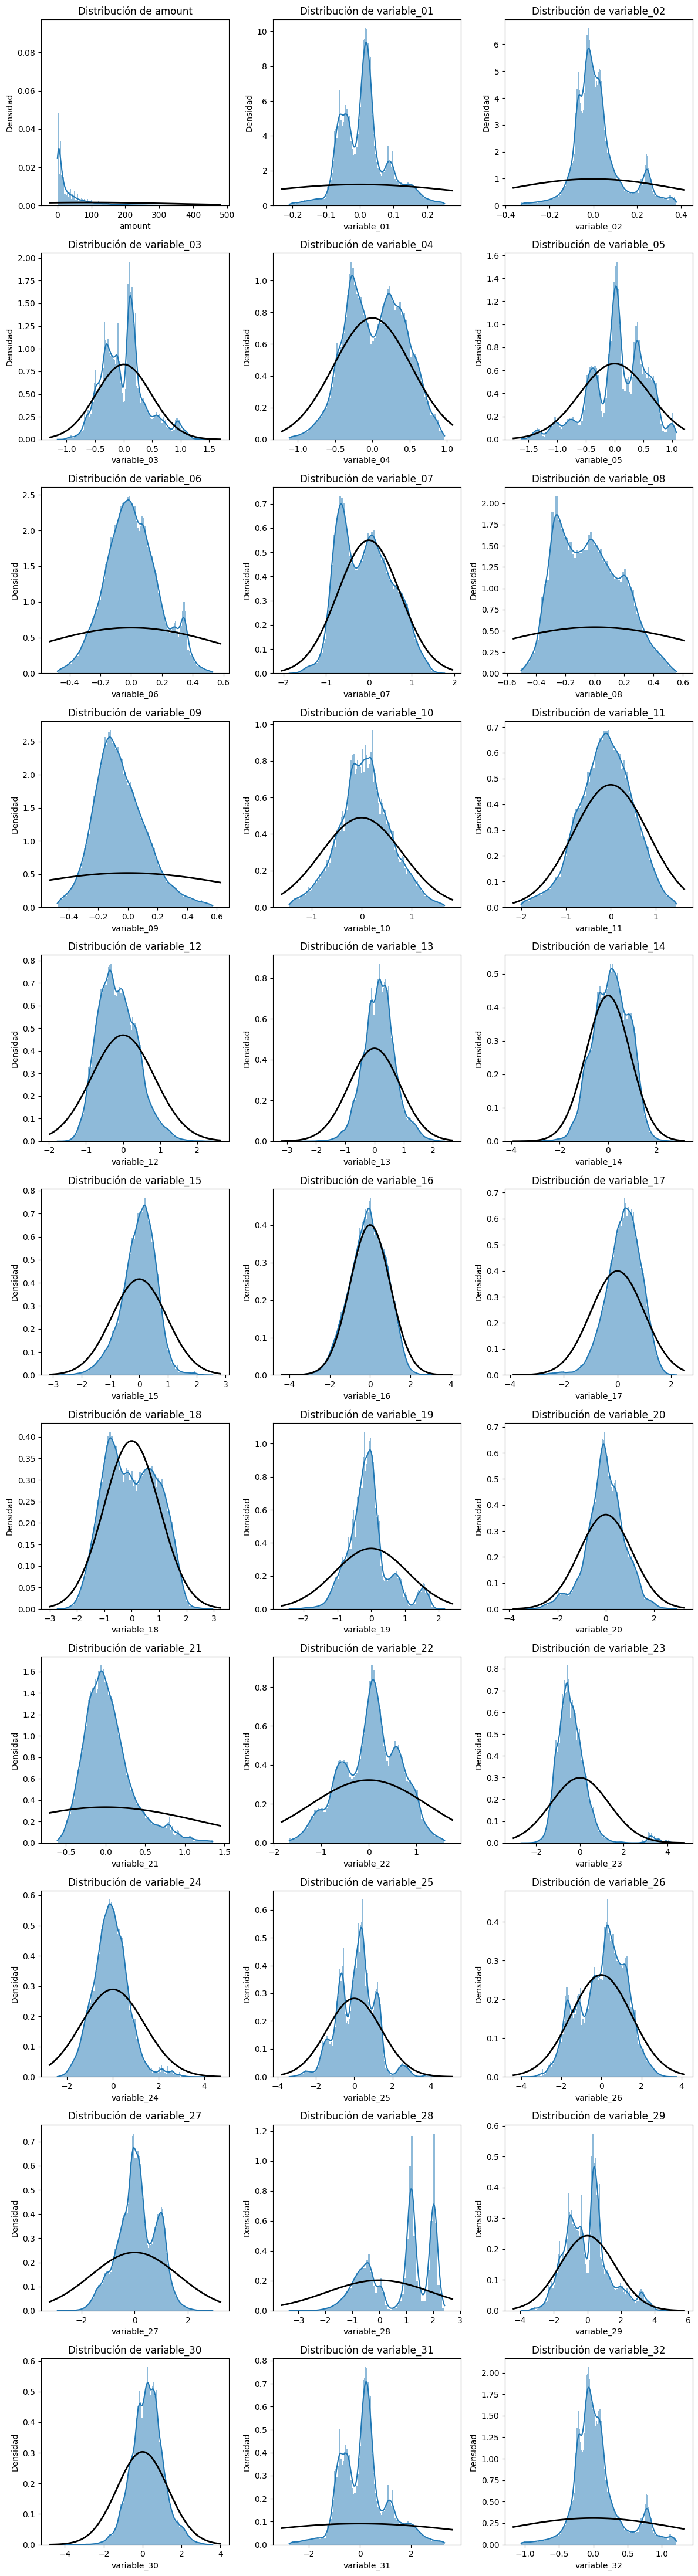

In [302]:
list_descart = ['transaction_id','is_fraud','timestamp','outlier_score']
df_column_cont = df.drop(columns = list_descart)
list_column = df_column_cont.columns

num_var = len(list_column)
cols = 3
rows = (num_var // cols) + (num_var % cols > 0)
plt.figure(figsize=(cols * 4, rows * 4))
for i, var in enumerate(list_column, 1):
    plt.subplot(rows, cols, i)  
    sns.histplot(df_sin_out[var], kde=True, stat="density", linewidth=0)
    
    mu, std = norm.fit(df[var].dropna())  
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Densidad')

plt.tight_layout()
plt.show() 

In [303]:
df_sin_out['amount_log'] = np.log1p(df_sin_out['amount']) # En la caractersitca amount hay una distribucion logaritmica
                                                      # por lo que aplicamos log1p para linealizar la relacion

<Axes: xlabel='amount_log', ylabel='Density'>

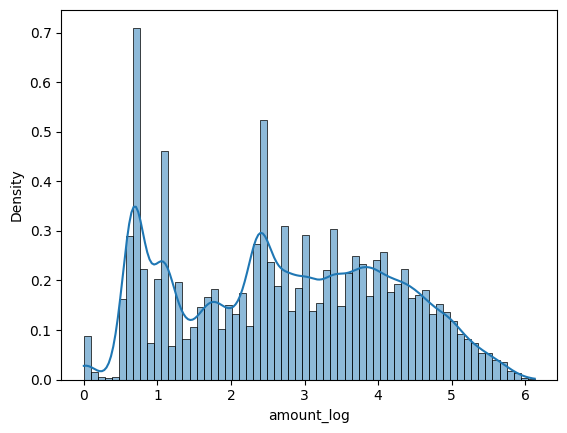

In [304]:
sns.histplot(df_sin_out['amount_log'],kde = True, stat = 'density')

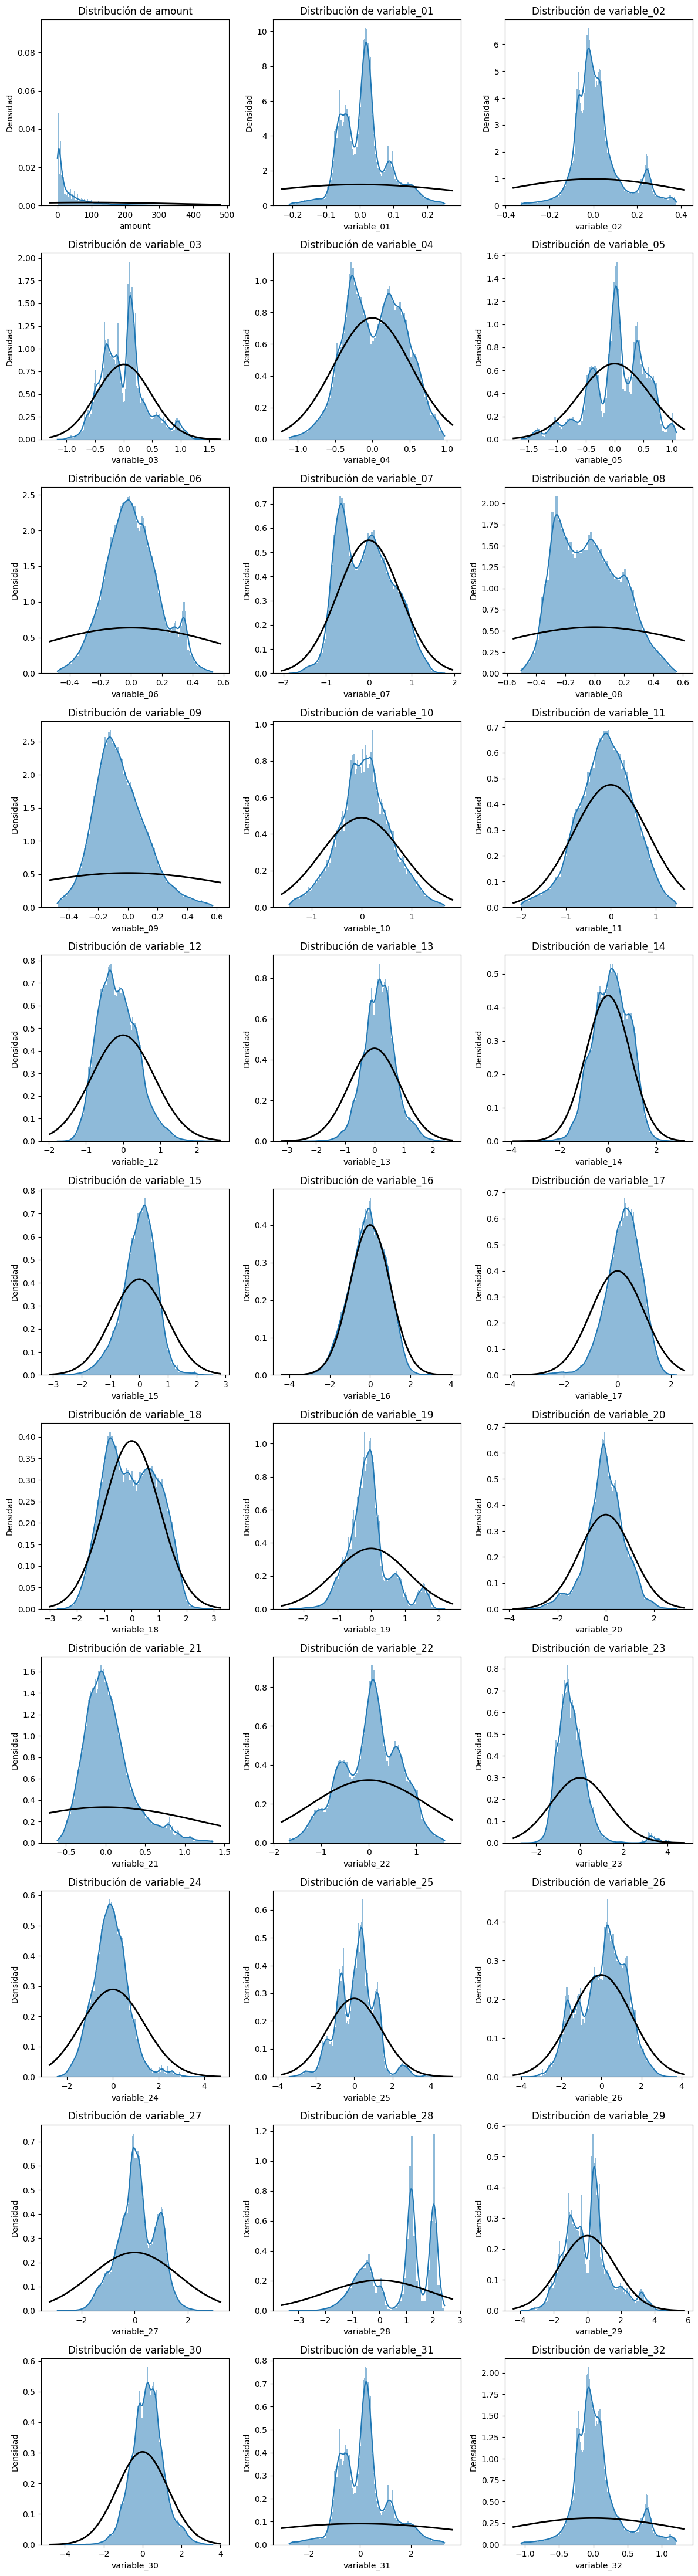

In [305]:
list_descart = ['transaction_id','is_fraud','timestamp','outlier_score']
df_column_cont = df.drop(columns = list_descart)
list_column = df_column_cont.columns

num_var = len(list_column)
cols = 3
rows = (num_var // cols) + (num_var % cols > 0)
plt.figure(figsize=(cols * 4, rows * 4))
for i, var in enumerate(list_column, 1):
    plt.subplot(rows, cols, i)  
    sns.histplot(df_sin_out[var], kde=True, stat="density", linewidth=0)
    
    mu, std = norm.fit(df[var].dropna())  
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Densidad')

plt.tight_layout()
plt.show() 

In [306]:
df_sin_out.isnull().sum()

transaction_id    0
timestamp         0
amount            0
variable_01       0
variable_02       0
variable_03       0
variable_04       0
variable_05       0
variable_06       0
variable_07       0
variable_08       0
variable_09       0
variable_10       0
variable_11       0
variable_12       0
variable_13       0
variable_14       0
variable_15       0
variable_16       0
variable_17       0
variable_18       0
variable_19       0
variable_20       0
variable_21       0
variable_22       0
variable_23       0
variable_24       0
variable_25       0
variable_26       0
variable_27       0
variable_28       0
variable_29       0
variable_30       0
variable_31       0
variable_32       0
is_fraud          0
outlier_score     0
amount_log        0
dtype: int64

# Ingenieria de Variables

In [307]:
df_sin_out.describe()

timestamp         amount    variable_01    variable_02  \
count  124952.000000  124952.000000  124952.000000  124952.000000   
mean    93766.805933      37.570249       0.013108       0.019404   
std     46726.668408      54.126870       0.071832       0.112271   
min         0.000000       0.000000      -0.209265      -0.329118   
25%     54110.750000       3.480000      -0.039248      -0.046869   
50%     79417.000000      14.980000       0.012022      -0.001190   
75%    139341.500000      49.560000       0.043923       0.055488   
max    172792.000000     457.500000       0.250998       0.380060   

         variable_03    variable_04    variable_05    variable_06  \
count  124952.000000  124952.000000  124952.000000  124952.000000   
mean        0.010318       0.042315       0.035933       0.008159   
std         0.396953       0.390144       0.495145       0.174173   
min        -1.159936      -1.114362      -1.627417      -0.479537   
25%        -0.284108      -0.264945      -0.291010      -0.109647   
50%         0.015419       0.048251       0.049513      -0.000833   
75%         0.202203       0.347620       0.404183       0.118302   
max         1.559771       0.968648       1.076700       0.529972   

         variable_07    variable_08    variable_09    variable_10  \
count  124952.000000  124952.000000  124952.000000  124952.000000   
mean       -0.067380      -0.037475      -0.051042       0.063274   
std         0.610309       0.215940       0.174897       0.532255   
min        -1.858913      -0.502850      -0.475425      -1.445108   
25%        -0.589866      -0.221006      -0.171438      -0.264199   
50%        -0.085984      -0.051372      -0.071338       0.058763   
75%         0.386461       0.125406       0.055320       0.401011   
max         1.767294       0.555254       0.571786       1.656437   

         variable_11    variable_12    variable_13    variable_14  \
count  124952.000000  124952.000000  124952.000000  124952.000000   
mean       -0.114716      -0.135651       0.168964       0.129626   
std         0.607580       0.525460       0.544084       0.737776   
min        -1.998971      -1.770077      -2.917271      -3.586617   
25%        -0.512366      -0.525924      -0.179204      -0.394105   
50%        -0.100057      -0.177947       0.170464       0.145250   
75%         0.306057       0.219068       0.497731       0.685410   
max         1.464259       2.417819       2.401279       2.819586   

         variable_15    variable_16    variable_17    variable_18  \
count  124952.000000  124952.000000  124952.000000  124952.000000   
mean       -0.009029      -0.091870       0.228774       0.002272   
std         0.598093       0.916227       0.654885       0.937710   
min        -2.845698      -4.008640      -3.590679      -2.716111   
25%        -0.361237      -0.703479      -0.164709      -0.767207   
50%         0.044640      -0.065769       0.275846      -0.035336   
75%         0.396867       0.570190       0.683725       0.767612   
max         2.550348       3.693197       2.199661       2.959124   

         variable_19    variable_20    variable_21    variable_22  \
count  124952.000000  124952.000000  124952.000000  124952.000000   
mean       -0.077841      -0.018391       0.039671       0.043006   
std         0.618152       0.800917       0.310043       0.609255   
min        -2.422679      -3.503831      -0.606790      -1.672462   
25%        -0.436035      -0.465472      -0.171792      -0.394696   
50%        -0.120348      -0.016822      -0.009879       0.078403   
75%         0.165141       0.478532       0.184863       0.490190   
max         2.171590       2.930391       1.352542       1.591650   

         variable_23    variable_24    variable_25    variable_26  \
count  124952.000000  124952.000000  124952.000000  124952.000000   
mean       -0.353206      -0.085536       0.117308       0.065984   
std         0.773089       0.772769       1.004314       1.159371   
min

### Estandarizacion

In [308]:
list_descart = ['transaction_id','is_fraud','timestamp','outlier_score']
#list_descart = ['transaction_id','is_fraud','timestamp','outlier_score','outlier_score','cluster_variable_28','variable_28_cluster_3',
#                'variable_28_cluster_0','variable_28_cluster_2','cluster_variable_28'] # Variables que no nos sirve aplicar la normalizaciom
df_column_cont = df_sin_out.drop(columns = list_descart)
list_column = df_column_cont.columns

In [309]:
# Aplicamos estandarizacion 
sc = StandardScaler()
df_PCA = pd.DataFrame()
df_PCA[list_column] = sc.fit_transform(df_sin_out[list_column])

In [310]:
df_PCA.describe() # Verificamos que se aplico correctamente la estandarizacion con las medias y std

amount   variable_01   variable_02   variable_03   variable_04  \
count  1.249520e+05  1.249520e+05  1.249520e+05  1.249520e+05  1.249520e+05   
mean   5.723488e-17 -1.296528e-17  2.956993e-17  1.464280e-17  1.290841e-17   
std    1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00   
min   -6.941173e-01 -3.095769e+00 -3.104296e+00 -2.948102e+00 -2.964759e+00   
25%   -6.298237e-01 -7.288692e-01 -5.902982e-01 -7.417187e-01 -7.875607e-01   
50%   -4.173591e-01 -1.511912e-02 -1.834295e-01  1.284948e-02  1.521500e-02   
75%    2.215129e-01  4.289974e-01  3.214023e-01  4.833953e-01  7.825472e-01   
max    7.758280e+00  3.311792e+00  3.212376e+00  3.903380e+00  2.374346e+00   

        variable_05   variable_06   variable_07   variable_08   variable_09  \
count  1.249520e+05  1.249520e+05  1.249520e+05  1.249520e+05  1.249520e+05   
mean   3.548392e-17  1.393199e-17 -4.526474e-17  2.200685e-17 -3.821345e-17   
std    1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00   
min   -3.359331e+00 -2.800072e+00 -2.935465e+00 -2.155118e+00 -2.426479e+00   
25%   -6.602995e-01 -6.763712e-01 -8.561046e-01 -8.499170e-01 -6.883849e-01   
50%    2.742725e-02 -5.162522e-02 -3.048432e-02 -6.435215e-02 -1.160493e-01   
75%    7.437241e-01  6.323787e-01  7.436273e-01  7.542940e-01  6.081407e-01   
max    2.101951e+00  2.995957e+00  3.006152e+00  2.744885e+00  3.561121e+00   

        variable_10   variable_11   variable_12   variable_13   variable_14  \
count  1.249520e+05  1.249520e+05  1.249520e+05  1.249520e+05  1.249520e+05   
mean   2.160880e-18 -1.495556e-17 -1.956165e-17  1.057694e-17  3.730361e-17   
std    1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00   
min   -2.833958e+00 -3.101259e+00 -3.110482e+00 -5.672368e+00 -5.037106e+00   
25%   -6.152599e-01 -6.544843e-01 -7.427302e-01 -6.399180e-01 -7.098804e-01   
50%   -8.477051e-03  2.412749e-02 -8.049290e-02  2.756965e-03  2.117728e-02   
75%    6.345420e-01  6.925427e-01  6.750666e-01  6.042605e-01  7.533263e-01   
max    2.993243e+00  2.598805e+00  4.859518e+00  4.102900e+00  3.646051e+00   

        variable_15   variable_16   variable_17   variable_18   variable_19  \
count  1.249520e+05  1.249520e+05  1.249520e+05  1.249520e+05  1.249520e+05   
mean   5.459064e-18  4.435490e-18  9.001770e-17  2.738062e-17  2.399714e-17   
std    1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00   
min   -4.742875e+00 -4.274907e+00 -5.832268e+00 -2.898970e+00 -3.793318e+00   
25%   -5.888865e-01 -6.675324e-01 -6.008449e-01 -8.205977e-01 -5.794615e-01   
50%    8.973487e-02  2.848736e-02  7.187851e-02 -4.010705e-02 -6.876456e-02   
75%    6.786531e-01  7.225967e-01  6.947062e-01  8.161824e-01  3.930795e-01   
max    4.279246e+00  4.131162e+00  3.009526e+00  3.153280e+00  3.638974e+00   

        variable_20   variable_21   variable_22   variable_23   variable_24  \
count  1.249520e+05  1.249520e+05  1.249520e+05  1.249520e+05  1.249520e+05   
mean   1.563795e-17  3.212887e-18  3.568295e-17  7.337040e-17  2.900128e-18   
std    1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00   
min   -4.351828e+00 -2.085080e+00 -2.815693e+00 -3.021456e+00 -3.020622e+00   
25%   -5.582129e-01 -6.820481e-01 -7.184246e-01 -6.003439e-01 -6.431198e-01   
50%    1.958455e-03 -1.598186e-01  5.809812e-02 -1.469551e-01 -2.564746e-02   
75%    6.204451e-01  4.682980e-01  7.339870e-01  4.155464e-01  5.998722e-01   
max    3.681770e+00  4.234499e+00  2.541874e+00  6.168284e+00  5.762258e+00   

        variable_25   variable_26   variable_27   variable_28   variable_29  \
count  1.249520e+05  1.249520e+05  1.249520e+05  1.249520e+05  1.249520e+05   
mean  -2.445206e-18 -2.274610e-17  3.792913e-17  1.025281e-16  1.890770e-17   
std    1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00   
min   -3.494100e+00 -3.502675e+00 -4.112377e+00 -3.587427e+00 -2.948102e+00   
25%   -7.156297e-01 -7.234641e-01 -6.326080e-01 -9.835128e

### PCA

In [311]:
X = df_PCA
y = df_sin_out['is_fraud']

In [312]:
df_PCA

amount  variable_01  variable_02  variable_03  variable_04  \
0      -0.472415    -1.175506    -0.465871     0.251092     0.762730   
1       3.165164     0.622991    -0.140153     0.167343     0.898306   
2      -0.416990    -0.728239    -0.455736    -0.854008    -0.224044   
3      -0.693933    -0.992803    -0.635337     1.620365    -1.102718   
4      -0.601926     0.220914     0.435243    -1.129634     0.792938   
...          ...          ...          ...          ...          ...   
124947 -0.332743     0.589860    -0.427754     0.198147    -0.939313   
124948  3.130246     0.643773    -0.147635    -1.136740     0.820134   
124949 -0.232422     0.347006     0.778695     0.117099    -0.634416   
124950 -0.657536     0.995541     1.967815     0.163791    -0.498665   
124951 -0.307062    -1.144900     1.501893    -0.823700     0.219709   

        variable_05  variable_06  variable_07  variable_08  variable_09  \
0         -1.337115    -0.717748     2.110751     1.998320     0.587473   
1          0.854100    -1.649245     0.823580     1.240280     1.961681   
2          1.152061     1.129131     0.133869     0.235779     0.387894   
3          1.555850     1.258705     1.219420     1.143642    -0.888314   
4          1.017340     0.039708     0.373170     0.161520    -0.582523   
...             ...          ...          ...          ...          ...   
124947    -0.896801    -1.035594     1.454703     0.911399    -1.004320   
124948     0.062147    -0.912603    -0.164153     0.540910     1.757230   
124949     1.198639     0.772834    -1.075786    -0.748042     0.154384   
124950    -0.178121    -0.427834    -0.955876    -0.915219     1.012499   
124951    -0.723495    -0.295672     0.440064     0.731477     1.144003   

        variable_10  variable_11  variable_12  variable_13  variable_14  \
0          1.196442    -1.761993    -0.090205     1.621197     0.186774   
1          1.053868     0.727374     0.195912    -0.994624     1.777240   
2          1.499747    -1.278669     2.427526     1.856640    -1.253487   
3          0.571063     1.376380    -1.100444     0.601385     0.677667   
4         -0.110715     0.836182    -0.526017     0.103091    -0.870632   
...             ...          ...          ...          ...          ...   
124947     0.890401     0.544898     2.109838    -1.821257     1.442082   
124948    -1.718277    -0.825428    -0.178328    -0.373920     1.522471   
124949    -0.526995     0.064749     0.926730     0.536296     1.101746   
124950     0.488932     0.983681    -0.411947     0.941792     0.142938   
124951    -0.389578     0.073794     0.572002    -0.537343     1.624148   

        variable_15  variable_16  variable_17  variable_18  variable_19  \
0         -0.353691     1.582667    -0.840908    -1.198156     1.504879   
1         -0.067137    -0.549223     0.224889    -0.555897    -1.888686   
2         -1.752165    -0.054724    -0.389795     1.499347     0.848415   
3          0.558856    -0.934102     0.434146     0.908995    -0.158253   
4         -0.163535    -0.242338     1.357027     1.119384     0.086237   
...             ...          ...          ...          ...          ...   
124947    -0.636467     2.006150    -1.371781    -0.904223     1.865274   
124948     0.582105     0.435808     0.305742    -0.119375    -0.031246   
124949     0.196029    -0.858394    -0.884509    -0.257023    -1.045851   
124950    -0.353558     0.026933     0.289847     1.241963    -0.416494   
124951     1.022874     0.074178     1.004730     1.670085    -0.383143   

        variable_20  variable_21  variable_22  variable_23  variable_24  \
0         -0.771049    -1.564300    -0.483246    -0.822694    -0.106932   
1          2.562736    -0.364352    -0.792502    -0.660140    -1.968754   
2         -0.965040    -0.642440    -0.564371    -0.561143     0.137175   
3          1.832557     0.329677    -1.472410     0.007545    -0.859868   
4          0.837946     0.643601    -1.186609     0.458885    -1.23

In [313]:
pca = PCA(n_components=X.shape[1])
X_pca = pca.fit_transform(X)

In [314]:
f_values, _ = f_regression(X, y)  
Importancia_Caracteristica = pd.DataFrame({'Caracteristica': X.columns, 'Importancia': f_values})
Importancia_Caracteristica = Importancia_Caracteristica.sort_values(by='Importancia', ascending=False)

In [315]:
Importancia_Caracteristica

Caracteristica  Importancia
15    variable_15    51.608907
12    variable_12    31.729406
19    variable_19    10.969827
11    variable_11     7.531892
30    variable_30     4.914452
13    variable_13     4.914452
3     variable_03     3.609049
29    variable_29     3.609049
24    variable_24     2.719489
18    variable_18     2.717723
22    variable_22     2.238361
4     variable_04     2.025335
6     variable_06     1.884025
27    variable_27     1.807588
9     variable_09     1.490557
25    variable_25     1.311663
10    variable_10     0.998256
21    variable_21     0.690255
26    variable_26     0.469333
32    variable_32     0.444897
2     variable_02     0.444897
0          amount     0.395532
17    variable_17     0.386764
14    variable_14     0.170127
28    variable_28     0.093450
23    variable_23     0.093054
33     amount_log     0.090644
5     variable_05     0.085832
16    variable_16     0.037989
7     variable_07     0.010245
20    variable_20     0.007137
1     variable_01     0.003346
31    variable_31     0.003346
8     variable_08     0.000461

In [316]:
top_5 = Importancia_Caracteristica.head(5)['Caracteristica'].values
top_2 = Importancia_Caracteristica.head(2)['Caracteristica'].values

In [317]:
df_PCA['top_5_mean'] = df_PCA[top_5].mean(axis = 1)
df_PCA['top_5_std'] = df_PCA[top_5].std(axis = 1)
df_PCA['top_5_sum'] = df_PCA[top_5].sum(axis = 1)
df_PCA['top_5_min'] = df_PCA[top_5].min(axis = 1)
df_PCA['top_5_max'] = df_PCA[top_5].max(axis = 1)
df_PCA['top_5_prod'] = df_PCA[top_5].prod(axis = 1)
df_PCA['top_2_prod'] = df_PCA[top_2].prod(axis = 1)
df_PCA['top_5_prod'] = np.sqrt(np.abs(df_PCA['top_5_prod']))
df_PCA['top_2_prod'] = np.sqrt(np.abs(df_PCA['top_2_prod']))
df_PCA['top_5_prod'] = np.log1p(df_PCA['top_5_prod'])
df_PCA['top_2_prod'] = np.log1p(df_PCA['top_2_prod'])

In [318]:
df_PCA.isnull().sum()

amount         0
variable_01    0
variable_02    0
variable_03    0
variable_04    0
variable_05    0
variable_06    0
variable_07    0
variable_08    0
variable_09    0
variable_10    0
variable_11    0
variable_12    0
variable_13    0
variable_14    0
variable_15    0
variable_16    0
variable_17    0
variable_18    0
variable_19    0
variable_20    0
variable_21    0
variable_22    0
variable_23    0
variable_24    0
variable_25    0
variable_26    0
variable_27    0
variable_28    0
variable_29    0
variable_30    0
variable_31    0
variable_32    0
amount_log     0
top_5_mean     0
top_5_std      0
top_5_sum      0
top_5_min      0
top_5_max      0
top_5_prod     0
top_2_prod     0
dtype: int64

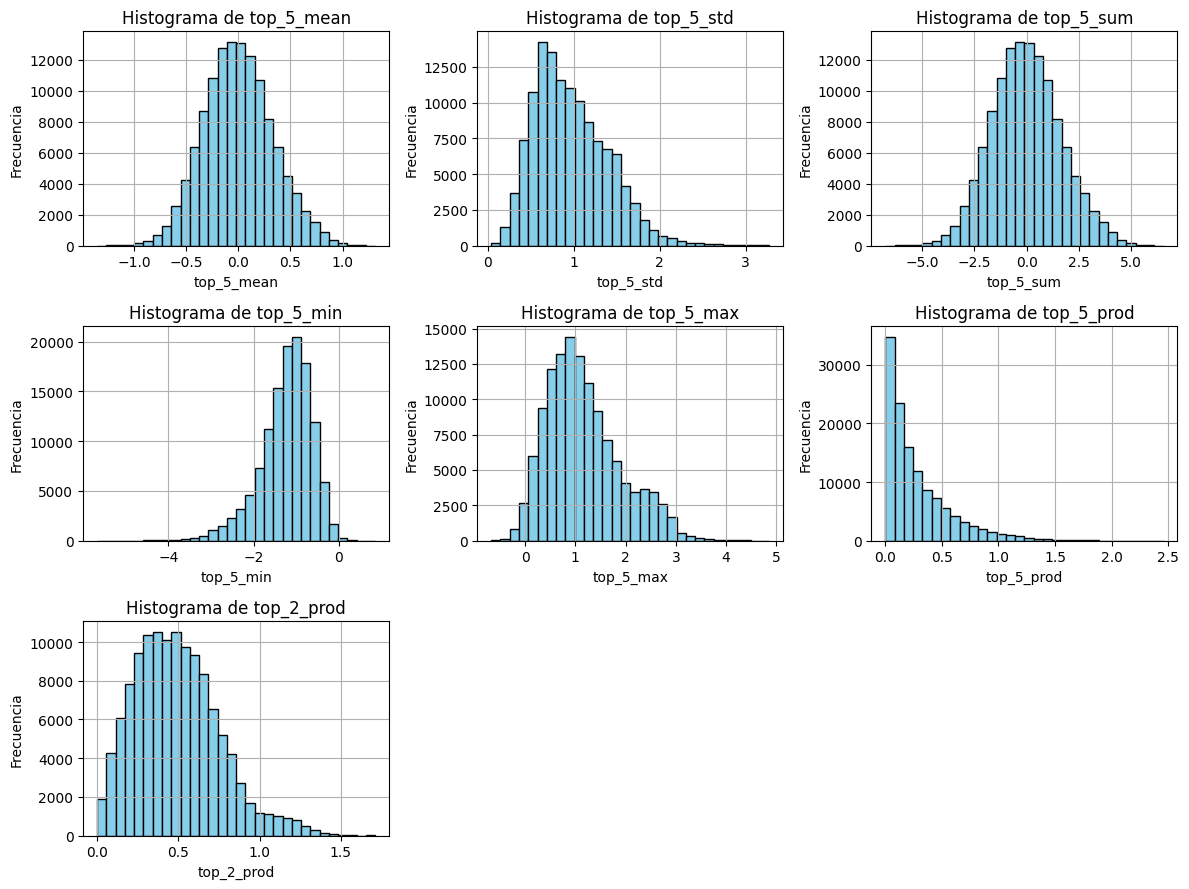

In [319]:
lst = ['top_5_mean','top_5_std','top_5_sum','top_5_min','top_5_max','top_5_prod','top_2_prod']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))  
axes = axes.flatten()
for i,c in enumerate(lst):
    df_PCA[c].hist(ax=axes[i], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histograma de {c}')
    axes[i].set_xlabel(c)
    axes[i].set_ylabel('Frecuencia')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show() 

In [320]:
df_PCA.describe()

amount   variable_01   variable_02   variable_03   variable_04  \
count  1.249520e+05  1.249520e+05  1.249520e+05  1.249520e+05  1.249520e+05   
mean   5.723488e-17 -1.296528e-17  2.956993e-17  1.464280e-17  1.290841e-17   
std    1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00   
min   -6.941173e-01 -3.095769e+00 -3.104296e+00 -2.948102e+00 -2.964759e+00   
25%   -6.298237e-01 -7.288692e-01 -5.902982e-01 -7.417187e-01 -7.875607e-01   
50%   -4.173591e-01 -1.511912e-02 -1.834295e-01  1.284948e-02  1.521500e-02   
75%    2.215129e-01  4.289974e-01  3.214023e-01  4.833953e-01  7.825472e-01   
max    7.758280e+00  3.311792e+00  3.212376e+00  3.903380e+00  2.374346e+00   

        variable_05   variable_06   variable_07   variable_08   variable_09  \
count  1.249520e+05  1.249520e+05  1.249520e+05  1.249520e+05  1.249520e+05   
mean   3.548392e-17  1.393199e-17 -4.526474e-17  2.200685e-17 -3.821345e-17   
std    1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00   
min   -3.359331e+00 -2.800072e+00 -2.935465e+00 -2.155118e+00 -2.426479e+00   
25%   -6.602995e-01 -6.763712e-01 -8.561046e-01 -8.499170e-01 -6.883849e-01   
50%    2.742725e-02 -5.162522e-02 -3.048432e-02 -6.435215e-02 -1.160493e-01   
75%    7.437241e-01  6.323787e-01  7.436273e-01  7.542940e-01  6.081407e-01   
max    2.101951e+00  2.995957e+00  3.006152e+00  2.744885e+00  3.561121e+00   

        variable_10   variable_11   variable_12   variable_13   variable_14  \
count  1.249520e+05  1.249520e+05  1.249520e+05  1.249520e+05  1.249520e+05   
mean   2.160880e-18 -1.495556e-17 -1.956165e-17  1.057694e-17  3.730361e-17   
std    1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00   
min   -2.833958e+00 -3.101259e+00 -3.110482e+00 -5.672368e+00 -5.037106e+00   
25%   -6.152599e-01 -6.544843e-01 -7.427302e-01 -6.399180e-01 -7.098804e-01   
50%   -8.477051e-03  2.412749e-02 -8.049290e-02  2.756965e-03  2.117728e-02   
75%    6.345420e-01  6.925427e-01  6.750666e-01  6.042605e-01  7.533263e-01   
max    2.993243e+00  2.598805e+00  4.859518e+00  4.102900e+00  3.646051e+00   

        variable_15   variable_16   variable_17   variable_18   variable_19  \
count  1.249520e+05  1.249520e+05  1.249520e+05  1.249520e+05  1.249520e+05   
mean   5.459064e-18  4.435490e-18  9.001770e-17  2.738062e-17  2.399714e-17   
std    1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00   
min   -4.742875e+00 -4.274907e+00 -5.832268e+00 -2.898970e+00 -3.793318e+00   
25%   -5.888865e-01 -6.675324e-01 -6.008449e-01 -8.205977e-01 -5.794615e-01   
50%    8.973487e-02  2.848736e-02  7.187851e-02 -4.010705e-02 -6.876456e-02   
75%    6.786531e-01  7.225967e-01  6.947062e-01  8.161824e-01  3.930795e-01   
max    4.279246e+00  4.131162e+00  3.009526e+00  3.153280e+00  3.638974e+00   

        variable_20   variable_21   variable_22   variable_23   variable_24  \
count  1.249520e+05  1.249520e+05  1.249520e+05  1.249520e+05  1.249520e+05   
mean   1.563795e-17  3.212887e-18  3.568295e-17  7.337040e-17  2.900128e-18   
std    1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00   
min   -4.351828e+00 -2.085080e+00 -2.815693e+00 -3.021456e+00 -3.020622e+00   
25%   -5.582129e-01 -6.820481e-01 -7.184246e-01 -6.003439e-01 -6.431198e-01   
50%    1.958455e-03 -1.598186e-01  5.809812e-02 -1.469551e-01 -2.564746e-02   
75%    6.204451e-01  4.682980e-01  7.339870e-01  4.155464e-01  5.998722e-01   
max    3.681770e+00  4.234499e+00  2.541874e+00  6.168284e+00  5.762258e+00   

        variable_25   variable_26   variable_27   variable_28   variable_29  \
count  1.249520e+05  1.249520e+05  1.249520e+05  1.249520e+05  1.249520e+05   
mean  -2.445206e-18 -2.274610e-17  3.792913e-17  1.025281e-16  1.890770e-17   
std    1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00   
min   -3.494100e+00 -3.502675e+00 -4.112377e+00 -3.587427e+00 -2.948102e+00   
25%   -7.156297e-01 -7.234641e-01 -6.326080e-01 -9.835128e

In [321]:
scaler_new = StandardScaler()
df_PCA[lst] = scaler_new.fit_transform(df_PCA[lst]) # Normalizamos las variables recien creadas


In [322]:
df_PCA[lst].describe() # Comprobamos la normalizacion 

top_5_mean     top_5_std     top_5_sum     top_5_min     top_5_max  \
count  1.249520e+05  1.249520e+05  1.249520e+05  1.249520e+05  1.249520e+05   
mean  -8.359193e-18 -6.238118e-16 -7.790540e-18 -1.227152e-16  3.047409e-16   
std    1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00   
min   -4.087206e+00 -2.181392e+00 -4.087206e+00 -7.445038e+00 -2.500965e+00   
25%   -6.873695e-01 -7.525687e-01 -6.873695e-01 -5.394785e-01 -7.371268e-01   
50%   -3.319068e-02 -1.502260e-01 -3.319068e-02  1.348126e-01 -1.660486e-01   
75%    6.542100e-01  6.596207e-01  6.542100e-01  6.999694e-01  5.671043e-01   
max    3.964783e+00  5.447522e+00  3.964783e+00  3.496425e+00  5.052734e+00   

         top_5_prod    top_2_prod  
count  1.249520e+05  1.249520e+05  
mean  -7.637004e-17  2.388341e-18  
std    1.000004e+00  1.000004e+00  
min   -9.885062e-01 -1.877537e+00  
25%   -7.329553e-01 -7.517302e-01  
50%   -3.394331e-01 -9.177224e-02  
75%    4.226220e-01  6.152051e-01  
max    7.718266e+00  4.664727e+00

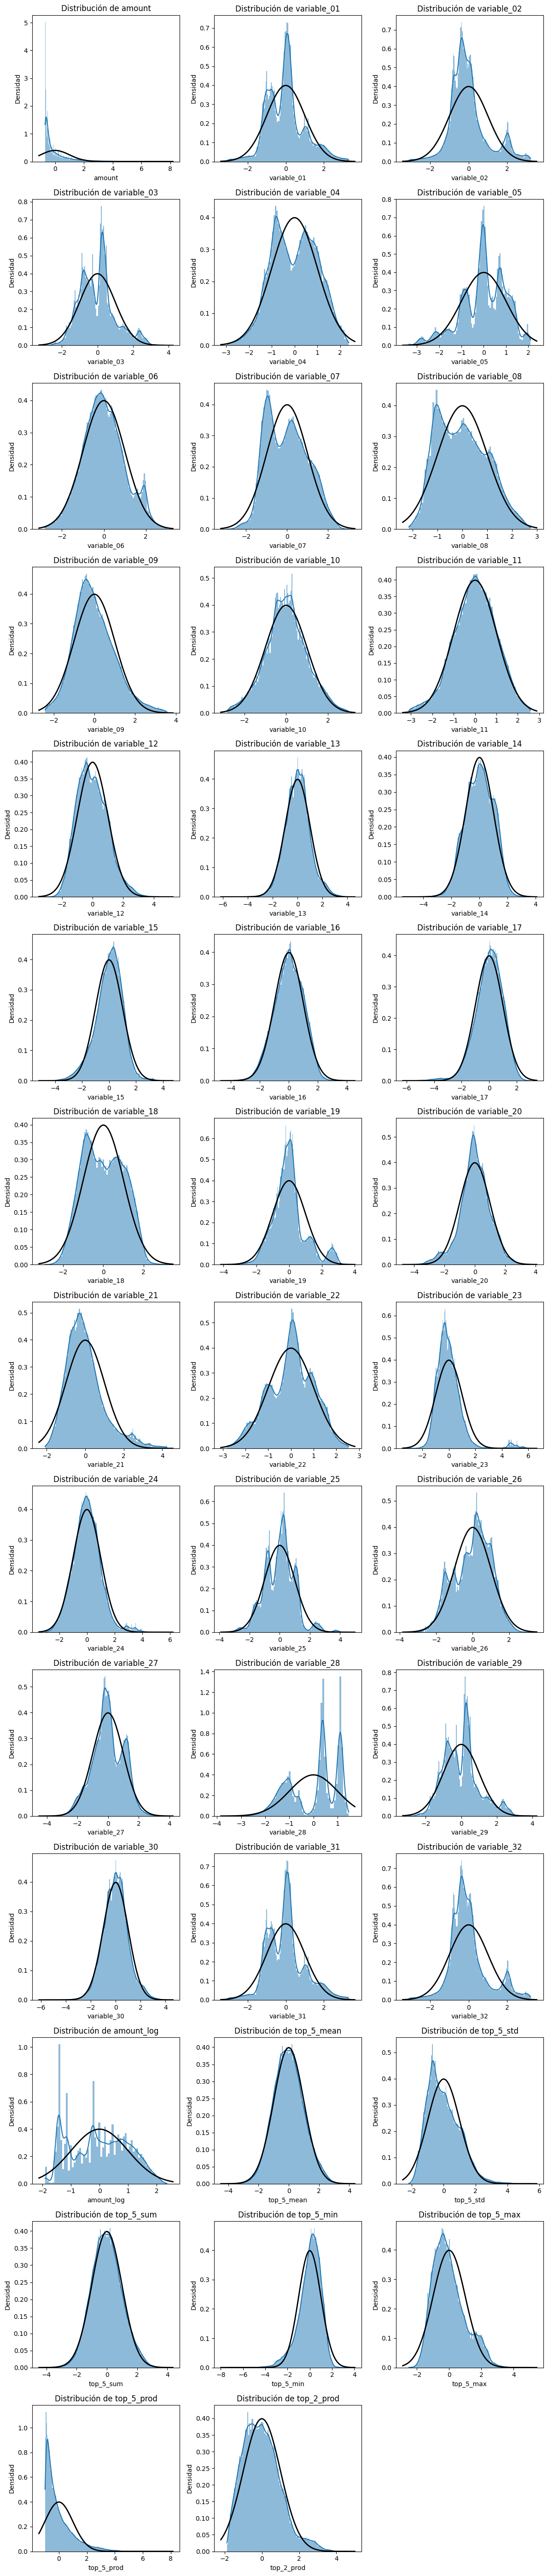

In [323]:
list_column = df_PCA.columns
num_var = len(list_column)
cols = 3
rows = (num_var // cols) + (num_var % cols > 0)
plt.figure(figsize=(cols * 4, rows * 4))
for i, var in enumerate(list_column, 1):
    plt.subplot(rows, cols, i)  
    sns.histplot(df_PCA[var], kde=True, stat="density", linewidth=0)
    
    mu, std = norm.fit(df_PCA[var].dropna())  
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

In [324]:
df_PCA.isnull().sum()

amount         0
variable_01    0
variable_02    0
variable_03    0
variable_04    0
variable_05    0
variable_06    0
variable_07    0
variable_08    0
variable_09    0
variable_10    0
variable_11    0
variable_12    0
variable_13    0
variable_14    0
variable_15    0
variable_16    0
variable_17    0
variable_18    0
variable_19    0
variable_20    0
variable_21    0
variable_22    0
variable_23    0
variable_24    0
variable_25    0
variable_26    0
variable_27    0
variable_28    0
variable_29    0
variable_30    0
variable_31    0
variable_32    0
amount_log     0
top_5_mean     0
top_5_std      0
top_5_sum      0
top_5_min      0
top_5_max      0
top_5_prod     0
top_2_prod     0
dtype: int64

In [325]:
df_PCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124952 entries, 0 to 124951
Data columns (total 41 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   amount       124952 non-null  float64
 1   variable_01  124952 non-null  float64
 2   variable_02  124952 non-null  float64
 3   variable_03  124952 non-null  float64
 4   variable_04  124952 non-null  float64
 5   variable_05  124952 non-null  float64
 6   variable_06  124952 non-null  float64
 7   variable_07  124952 non-null  float64
 8   variable_08  124952 non-null  float64
 9   variable_09  124952 non-null  float64
 10  variable_10  124952 non-null  float64
 11  variable_11  124952 non-null  float64
 12  variable_12  124952 non-null  float64
 13  variable_13  124952 non-null  float64
 14  variable_14  124952 non-null  float64
 15  variable_15  124952 non-null  float64
 16  variable_16  124952 non-null  float64
 17  variable_17  124952 non-null  float64
 18  variable_18  124952 non-

In [326]:
X = df_PCA
pca = PCA(n_components = 20)
X_pca = pca.fit_transform(X)

In [327]:
f_values, _ = f_regression(X_pca,y)
Importancia = pd.DataFrame({'Feature': range(1, X_pca.shape[1] + 1), 'Importancia': f_values})
Importancia = Importancia.sort_values(by = 'Importancia', ascending = False) # Sacamos la importancia de las variables respecto a la target

In [328]:
top = Importancia['Feature'].head(15)

In [329]:
X_PCA_top = X_pca[:,top -1]
df_PCA = pd.DataFrame(X_PCA_top, columns=[f'PC{i}' for i in top])

In [330]:
df_PCA

PC3       PC2      PC11       PC9      PC17      PC20       PC1  \
0      -0.876776 -0.637517 -2.301980  0.794708  0.011120 -1.048825  3.620009   
1      -0.677864 -0.300701 -1.240250  0.914973 -0.546392  0.295577 -0.511802   
2      -3.443914  2.227825  1.921110 -0.392904 -0.960343 -0.141287  5.485793   
3       1.114303 -2.193741 -1.146219  1.732323  0.204700  1.237542  2.180665   
4       2.654898 -0.607399  1.355710  0.516516 -1.177115  0.471825 -0.347271   
...          ...       ...       ...       ...       ...       ...       ...   
124947 -0.998176  3.759020 -1.567126 -1.169426  0.992795 -0.133923  3.177666   
124948  1.099693 -0.391055  1.743350  0.428189  0.591207 -0.893304 -1.001593   
124949  1.338829  1.383709  1.040322  1.234694 -0.615620 -0.169627 -1.736884   
124950  2.346321  2.519880  0.490892 -0.227303 -0.887013 -0.025492 -2.454861   
124951  2.785489  1.622265  1.481214 -0.922446  0.326267 -1.028113 -1.037002   

            PC13       PC6      PC15      PC12      PC10       PC4       PC7  \
0      -0.740107 -0.172115  0.962631  0.084181 -2.026919  0.601639 -1.188887   
1       0.002945 -1.391479 -2.531214 -0.795988  1.529128  5.426533  0.532863   
2      -0.100428 -0.726045  0.419517 -0.969697 -0.516695 -2.464060 -0.867477   
3      -0.454650  0.829036 -0.511191 -2.230730 -1.614436 -1.518119  0.178022   
4       0.539308  0.231829 -1.057999 -0.303893 -0.968991  0.907769 -1.764835   
...          ...       ...       ...       ...       ...       ...       ...   
124947 -1.002535 -1.442506  0.134403  1.545221 -2.870626  0.932769  1.985537   
124948  0.453946 -0.921684  0.835431  0.314917  2.449992  4.069869 -0.155989   
124949 -1.223243 -1.191532 -0.176028  0.028235  1.082145 -1.366866  1.379756   
124950  0.958338  0.050409 -0.665757 -0.436332 -0.315878 -2.128866 -0.637029   
124951 -1.025561  1.406605 -0.165398  1.114504 -0.732799  1.228059 -0.608787   

             PC8  
0      -3.753327  
1       0.422903  
2      -0.192827  
3       2.395723  
4       1.600507  
...          ...  
124947  0.398433  
124948 -1.471381  
124949  0.403637  
124950 -0.805678  
124951  1.706340  

[124952 rows x 15 columns]

In [331]:
df_PCA = df_PCA.reset_index(drop = True)
y = y.reset_index(drop = True)
df_PCA['y'] = y

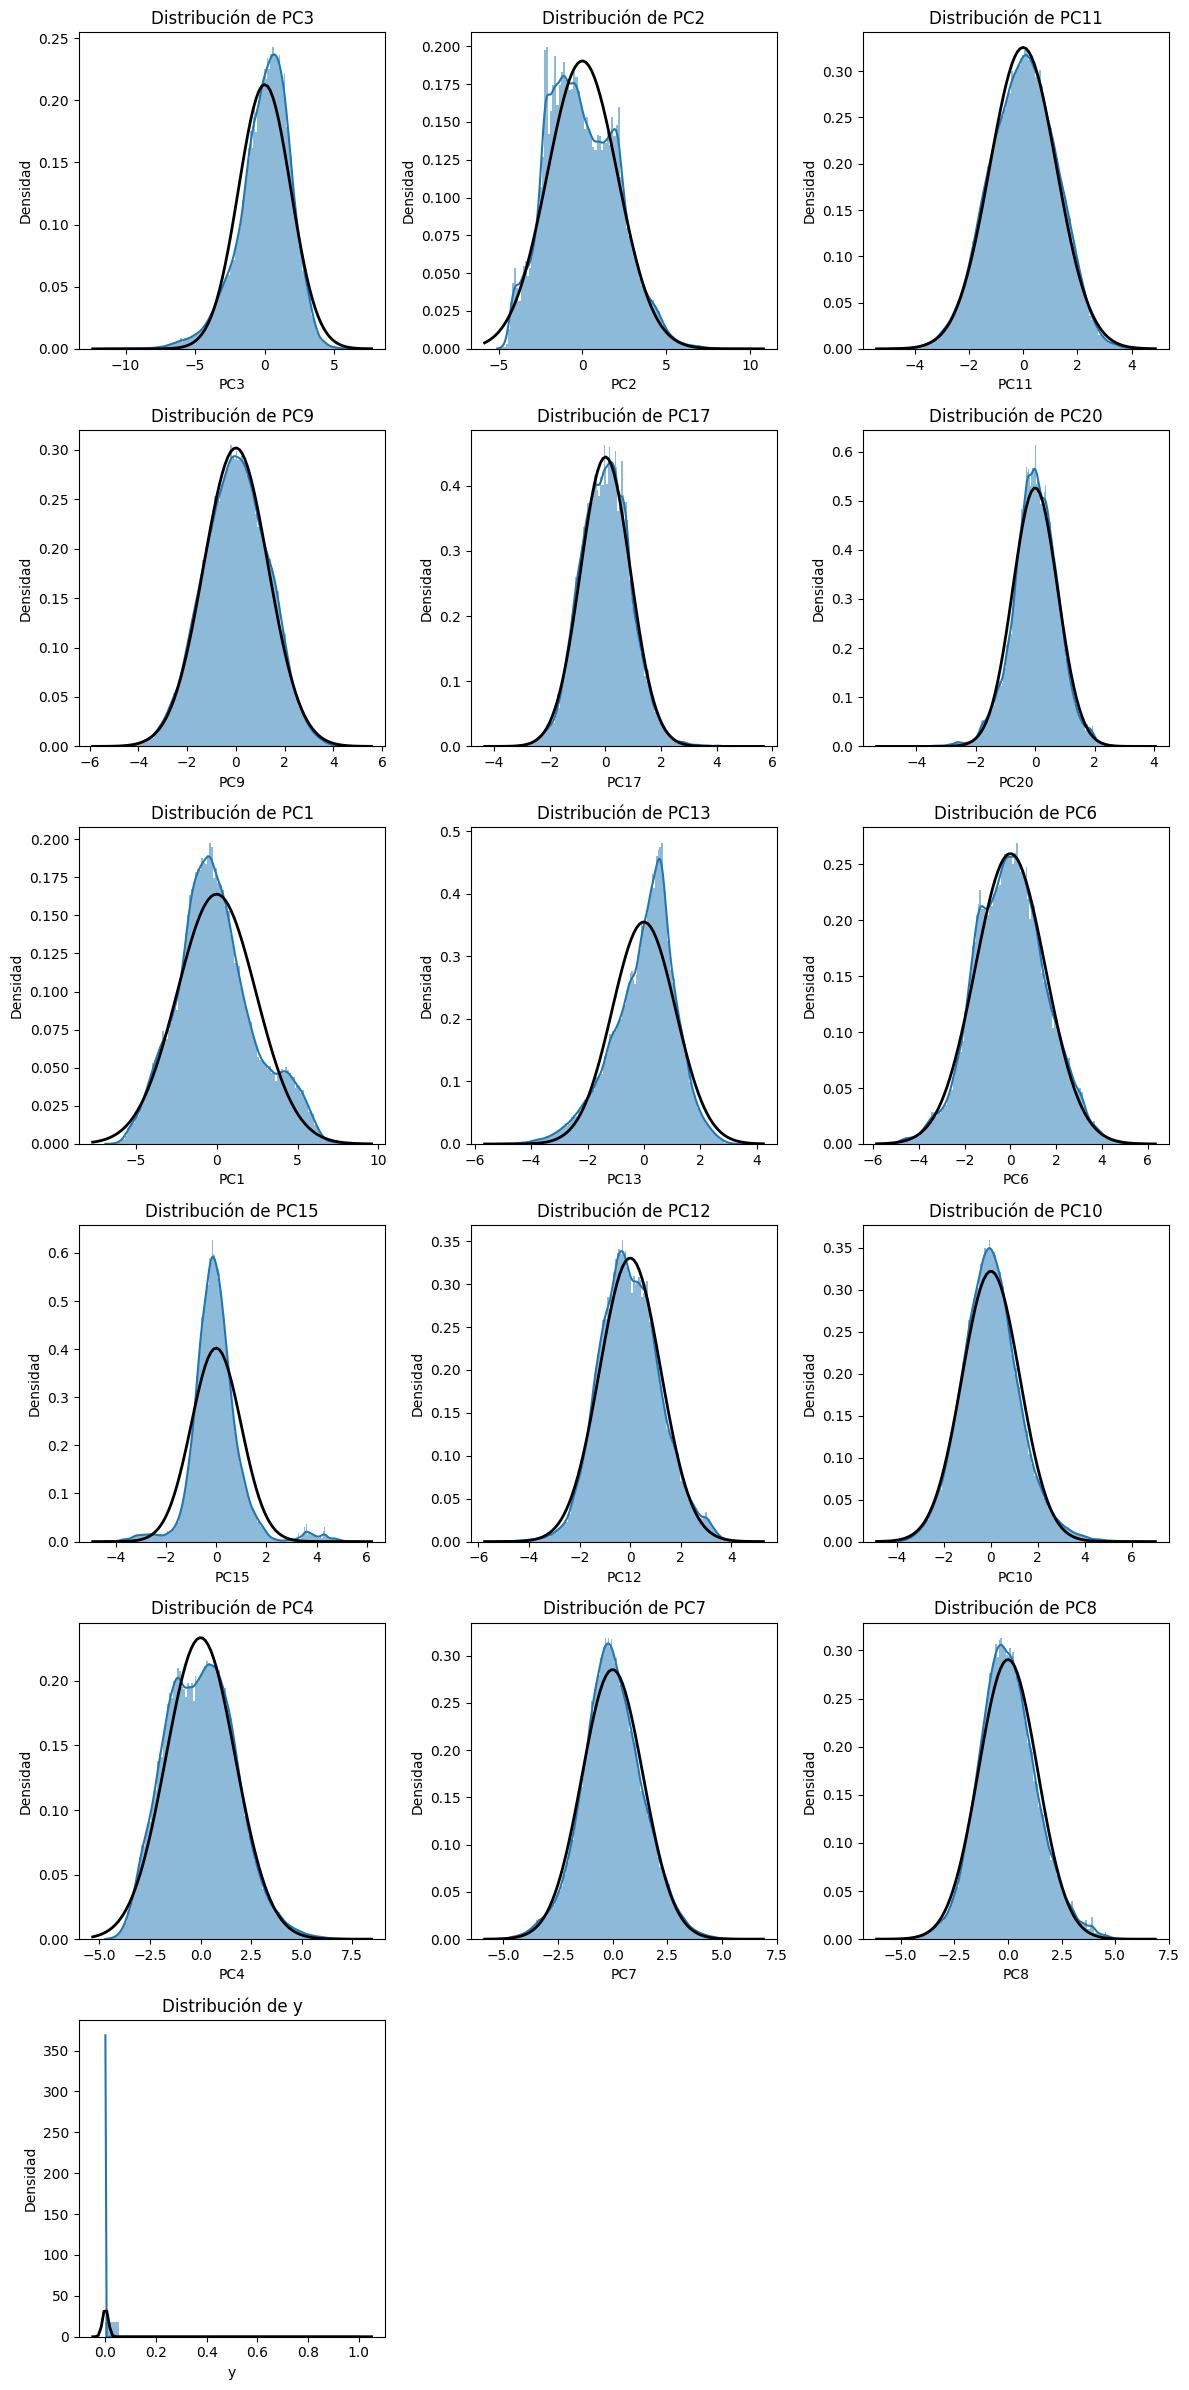

In [332]:
list_column = df_PCA.columns
num_var = len(list_column)
cols = 3
rows = (num_var // cols) + (num_var % cols > 0)
plt.figure(figsize=(cols * 4, rows * 4))
for i, var in enumerate(list_column, 1):
    plt.subplot(rows, cols, i)  
    sns.histplot(df_PCA[var], kde=True, stat="density", linewidth=0)
    
    mu, std = norm.fit(df_PCA[var].dropna())  
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Densidad')

plt.tight_layout()
plt.show() # Las nuevas variables lucen mucho mejor

In [333]:
df_model = df_PCA.copy()

### Subsampling con .sample()

In [334]:
porcent = (y.value_counts())/(len(y))*100 # Ahora toca corregir el desbalanceo
porcent                                                

is_fraud
0    99.987195
1     0.012805
Name: count, dtype: float64

In [335]:
df_model.isnull().sum()

PC3     0
PC2     0
PC11    0
PC9     0
PC17    0
PC20    0
PC1     0
PC13    0
PC6     0
PC15    0
PC12    0
PC10    0
PC4     0
PC7     0
PC8     0
y       0
dtype: int64

In [336]:
df_target_0 = df_model[df_model['y'] == 0]
df_target_1 = df_model[df_model['y'] == 1]
subsample = df_target_0.sample(frac = 0.05, random_state = 42)
df_model_sub = pd.concat([df_target_1,subsample] )

In [337]:
df_model_sub.describe()

PC3          PC2         PC11          PC9         PC17  \
count  6263.000000  6263.000000  6263.000000  6263.000000  6263.000000   
mean     -0.007145     0.011140     0.015728     0.000622     0.008283   
std       1.895844     2.103047     1.207237     1.307617     0.910456   
min      -8.763999    -4.695665    -4.158906    -5.356852    -2.849208   
25%      -1.085750    -1.610256    -0.830010    -0.903985    -0.625051   
50%       0.210660    -0.171982     0.035981     0.014196     0.005675   
75%       1.320668     1.536316     0.861667     0.912918     0.614707   
max       5.719029    10.055606     4.406350     4.141457     4.659568   

              PC20          PC1         PC13          PC6         PC15  \
count  6263.000000  6263.000000  6263.000000  6263.000000  6263.000000   
mean      0.011587    -0.000794    -0.008902     0.038188     0.010060   
std       0.774251     2.407593     1.136580     1.533670     0.990912   
min      -3.460182    -6.280301    -5.198734    -5.297106    -3.725132   
25%      -0.453688    -1.589031    -0.690787    -1.038531    -0.521038   
50%       0.014719    -0.225454     0.174219     0.019360    -0.066546   
75%       0.522383     1.346552     0.754109     1.052235     0.428274   
max       3.286887     8.709176     2.939388     5.393678     5.268007   

              PC12         PC10          PC4          PC7          PC8  \
count  6263.000000  6263.000000  6263.000000  6263.000000  6263.000000   
mean     -0.011690    -0.002444     0.018958     0.032815     0.003422   
std       1.214133     1.213915     1.715929     1.417521     1.370824   
min      -4.862041    -3.981130    -4.174670    -5.099500    -4.705393   
25%      -0.868913    -0.801694    -1.278429    -0.848342    -0.911916   
50%      -0.078234    -0.050388     0.018130    -0.026266    -0.072454   
75%       0.783267     0.745563     1.181115     0.921956     0.852536   
max       4.576777     5.360679     7.828329     5.269362     5.700370   

                 y  
count  6263.000000  
mean      0.002555  
std       0.050483  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [338]:
porcent = (df_model_sub['y'].value_counts())/(len(df_model_sub['y']))*100 # Ahora toca corregir el desbalanceo
porcent # Balanceamos el df, sin embargo aun es muy dispar la diferencia, por lo que haremos oversampling

y
0    99.744531
1     0.255469
Name: count, dtype: float64

### Oversampling

In [339]:
X = df_model_sub.drop(columns = ['y'])
y = df_model_sub['y']
smote = SMOTE(sampling_strategy=0.10)

In [340]:
X_res, y_res = smote.fit_resample(X,y)

In [341]:
porcent = (y_res.value_counts())/(len(y_res))*100 
porcent # Elegi una distribucion de 90% y 10% para no crear demsiados datos

y
0    90.918352
1     9.081648
Name: count, dtype: float64

In [342]:
df_mf = X_res.copy()
df_mf['y'] = y_res

In [343]:
list_descart = ['y']
df_column_cont = df_mf.drop(columns = list_descart)
list_column = df_column_cont.columns

In [344]:
df_sin_woe = df_mf.copy()

### WOE

In [345]:
# Discretizamos las variables continuas, ademas calculamos IV y WOE
lst = []
for i,l in enumerate(list_column):
    bestk = 0
    best_iv = 0
    for k in range (2,10):
        aux = df_mf[[l,'y']].copy()
        aux[l] = pd.cut(aux[l], bins = k, include_lowest = True).astype(str)
        aux['n'] = 1
        aux = aux.pivot_table(index = l, columns = 'y', aggfunc = 'count')
        aux.columns = aux.columns.droplevel()
        aux.reset_index(inplace = True)
        #aux[0] = aux[0] + 1e-6  
        #aux[1] = aux[1] + 1e-6
        for i in range(2):
            aux[i] /= aux[i].sum()
        aux['WOE'] = np.log(aux[0]/aux[1])
        aux['IV'] = aux['WOE']*(aux[0]-aux[1])
        if(aux['IV'].sum() > best_iv) & (~np.isinf(aux['IV'].sum())):
            best_iv = aux['IV'].sum()
            bestk = k
    aux = df_mf[[l,'y']].copy()
    print("%s %.4f %d" % (l,best_iv,bestk))
    if best_iv >= 0.02:
        lst.append(l)
    aux[l] = pd.cut(aux[l], bins = bestk, include_lowest = True).astype(str)
    aux['n'] = 1
    aux = aux.pivot_table(index = l, columns = 'y', aggfunc = 'count')
    aux.columns = aux.columns.droplevel()
    aux.reset_index(inplace = True)
    for i in range(2):
        aux[i] /= aux[i].sum()
    aux['WOE'] = np.log(aux[0]/aux[1])
    aux['WOE'] = aux['WOE'].fillna(0) # Se uso Fillna para evitar los Nan y perder columnas a la hora de entrenar
    df_mf[l] = pd.cut(df_mf[l], bins = bestk, include_lowest = True).astype(str)
    df_mf = df_mf.merge(aux[['WOE',l]], how = 'inner', on = l)
    df_mf.rename(columns = {'WOE':'W_%s'%l}, inplace = True)

PC3 1.7681 6
PC2 1.3490 8
PC11 1.3840 8
PC9 0.7839 7
PC17 0.7004 5
PC20 0.7754 7
PC1 0.5809 9
PC13 0.5201 9
PC6 0.9190 8
PC15 0.4199 5
PC12 0.2673 8
PC10 0.1935 4
PC4 0.6077 9
PC7 0.1270 8
PC8 0.5756 7


In [346]:
df_mf

PC3               PC2             PC11               PC9  \
0     (-3.936, -1.522]     (2.68, 4.524]   (1.194, 2.265]  (-1.286, 0.0708]   
1      (-1.522, 0.891]  (-2.852, -1.008]  (-0.947, 0.124]   (0.0708, 1.428]   
2     (-3.936, -1.522]     (2.68, 4.524]   (0.124, 1.194]    (1.428, 2.785]   
3      (-8.779, -6.35]     (2.68, 4.524]   (0.124, 1.194]  (-1.286, 0.0708]   
4      (-8.779, -6.35]     (0.836, 2.68]   (1.194, 2.265]  (-1.286, 0.0708]   
...                ...               ...              ...               ...   
6866  (-3.936, -1.522]     (0.836, 2.68]  (-0.947, 0.124]   (0.0708, 1.428]   
6867  (-3.936, -1.522]     (2.68, 4.524]   (0.124, 1.194]  (-1.286, 0.0708]   
6868   (-6.35, -3.936]     (2.68, 4.524]   (0.124, 1.194]  (-1.286, 0.0708]   
6869    (0.891, 3.305]  (-2.852, -1.008]   (1.194, 2.265]  (-1.286, 0.0708]   
6870   (-8.779, -6.35]     (0.836, 2.68]   (1.194, 2.265]  (-1.286, 0.0708]   

                 PC17              PC20               PC1              PC13  \
0     (-1.347, 0.154]   (-0.569, 0.395]    (3.713, 5.378]    (0.227, 1.131]   
1      (0.154, 1.656]   (-0.569, 0.395]  (-2.949, -1.284]    (0.227, 1.131]   
2     (-1.347, 0.154]   (-0.569, 0.395]    (7.044, 8.709]   (-0.678, 0.227]   
3     (-1.347, 0.154]   (-0.569, 0.395]    (2.047, 3.713]    (2.035, 2.939]   
4     (-1.347, 0.154]   (-0.569, 0.395]    (0.382, 2.047]    (1.131, 2.035]   
...               ...               ...               ...               ...   
6866  (-1.347, 0.154]    (0.395, 1.359]  (-2.949, -1.284]  (-1.582, -0.678]   
6867  (-1.347, 0.154]  (-1.532, -0.569]    (2.047, 3.713]    (1.131, 2.035]   
6868  (-1.347, 0.154]   (-0.569, 0.395]    (3.713, 5.378]    (1.131, 2.035]   
6869   (0.154, 1.656]  (-1.532, -0.569]   (-1.284, 0.382]    (0.227, 1.131]   
6870  (-1.347, 0.154]   (-0.569, 0.395]    (0.382, 2.047]    (1.131, 2.035]   

                   PC6              PC15              PC12              PC10  \
0     (-1.288, 0.0483]  (-1.927, -0.128]    (1.037, 2.217]     (0.69, 3.025]   
1      (0.0483, 1.385]  (-1.927, -0.128]    (1.037, 2.217]    (-1.646, 0.69]   
2     (-1.288, 0.0483]   (-0.128, 1.671]  (-1.322, -0.143]    (-1.646, 0.69]   
3       (1.385, 2.721]  (-1.927, -0.128]   (-0.143, 1.037]     (0.69, 3.025]   
4     (-1.288, 0.0483]   (-0.128, 1.671]  (-1.322, -0.143]     (0.69, 3.025]   
...                ...               ...               ...               ...   
6866   (0.0483, 1.385]  (-3.735, -1.927]  (-1.322, -0.143]  (-3.991, -1.646]   
6867  (-1.288, 0.0483]  (-1.927, -0.128]    (1.037, 2.217]     (0.69, 3.025]   
6868    (1.385, 2.721]  (-1.927, -0.128]  (-1.322, -0.143]    (-1.646, 0.69]   
6869   (0.0483, 1.385]   (-0.128, 1.671]   (-0.143, 1.037]  (-3.991, -1.646]   
6870  (-1.288, 0.0483]   (-0.128, 1.671]  (-1.322, -0.143]     (0.69, 3.025]   

                   PC4               PC7               PC8  y     W_PC3  \
0     (-1.507, -0.174]  (-1.211, 0.0849]  (-1.732, -0.246]  1 -1.195525   
1       (-0.174, 1.16]  (-3.803, -2.507]  (-3.219, -1.732]  1  0.786318   
2     (-2.841, -1.507]  (-2.507, -1.211]    (1.241, 2.727]  1 -1.195525   
3     (-1.507, -0.174]  (-2.507, -1.211]   (-0.246, 1.241]  1 -3.300040   
4       (-0.174, 1.16]  (-2.507, -1.211]   (-0.246, 1.241]  1 -3.300040   
...                ...               ...               ... ..       ...   
6866     (1.16, 2.494]  (-2.507, -1.211]   (-0.246, 1.241]  1 -1.195525   
6867    (-0.174, 1.16]  (-1.211, 0.0849]   (-0.246, 1.241]  1 -1.195525   
6868  (-1.507, -0.174]  (-2.507, -1.211]   (-0.246, 1.241]  1 -1.551876   
6869    (-0.174, 1.16]  (-1.211, 0.0849]   (-0.246, 1.241]  1  2.217588   
6870    (-0.174, 1.16]  (-2.507, -1.211]   (-0.246, 1.241]  1 -3.300040   

         W_PC2    W_PC11     W_PC9    W_PC17    W_PC20     W_PC1    W_PC13  \
0    -1.388282 -1.246045  0.151347 -0.560874 -0.139218 -0.138386  0.224592   
1     2.151195  1.036746  0.091806  1.511405 -0.139218  0.928678  0.224592   
2    -1.388282 -0.090578 

In [347]:
list_column

Index(['PC3', 'PC2', 'PC11', 'PC9', 'PC17', 'PC20', 'PC1', 'PC13', 'PC6',
       'PC15', 'PC12', 'PC10', 'PC4', 'PC7', 'PC8'],
      dtype='object')

In [348]:
varw = ['W_'+i for i in list_column]
df_mf = df_mf.dropna(axis=0,subset=['y']).reset_index(drop=True).copy()

In [349]:
df_mf

PC3               PC2             PC11               PC9  \
0     (-3.936, -1.522]     (2.68, 4.524]   (1.194, 2.265]  (-1.286, 0.0708]   
1      (-1.522, 0.891]  (-2.852, -1.008]  (-0.947, 0.124]   (0.0708, 1.428]   
2     (-3.936, -1.522]     (2.68, 4.524]   (0.124, 1.194]    (1.428, 2.785]   
3      (-8.779, -6.35]     (2.68, 4.524]   (0.124, 1.194]  (-1.286, 0.0708]   
4      (-8.779, -6.35]     (0.836, 2.68]   (1.194, 2.265]  (-1.286, 0.0708]   
...                ...               ...              ...               ...   
6866  (-3.936, -1.522]     (0.836, 2.68]  (-0.947, 0.124]   (0.0708, 1.428]   
6867  (-3.936, -1.522]     (2.68, 4.524]   (0.124, 1.194]  (-1.286, 0.0708]   
6868   (-6.35, -3.936]     (2.68, 4.524]   (0.124, 1.194]  (-1.286, 0.0708]   
6869    (0.891, 3.305]  (-2.852, -1.008]   (1.194, 2.265]  (-1.286, 0.0708]   
6870   (-8.779, -6.35]     (0.836, 2.68]   (1.194, 2.265]  (-1.286, 0.0708]   

                 PC17              PC20               PC1              PC13  \
0     (-1.347, 0.154]   (-0.569, 0.395]    (3.713, 5.378]    (0.227, 1.131]   
1      (0.154, 1.656]   (-0.569, 0.395]  (-2.949, -1.284]    (0.227, 1.131]   
2     (-1.347, 0.154]   (-0.569, 0.395]    (7.044, 8.709]   (-0.678, 0.227]   
3     (-1.347, 0.154]   (-0.569, 0.395]    (2.047, 3.713]    (2.035, 2.939]   
4     (-1.347, 0.154]   (-0.569, 0.395]    (0.382, 2.047]    (1.131, 2.035]   
...               ...               ...               ...               ...   
6866  (-1.347, 0.154]    (0.395, 1.359]  (-2.949, -1.284]  (-1.582, -0.678]   
6867  (-1.347, 0.154]  (-1.532, -0.569]    (2.047, 3.713]    (1.131, 2.035]   
6868  (-1.347, 0.154]   (-0.569, 0.395]    (3.713, 5.378]    (1.131, 2.035]   
6869   (0.154, 1.656]  (-1.532, -0.569]   (-1.284, 0.382]    (0.227, 1.131]   
6870  (-1.347, 0.154]   (-0.569, 0.395]    (0.382, 2.047]    (1.131, 2.035]   

                   PC6              PC15              PC12              PC10  \
0     (-1.288, 0.0483]  (-1.927, -0.128]    (1.037, 2.217]     (0.69, 3.025]   
1      (0.0483, 1.385]  (-1.927, -0.128]    (1.037, 2.217]    (-1.646, 0.69]   
2     (-1.288, 0.0483]   (-0.128, 1.671]  (-1.322, -0.143]    (-1.646, 0.69]   
3       (1.385, 2.721]  (-1.927, -0.128]   (-0.143, 1.037]     (0.69, 3.025]   
4     (-1.288, 0.0483]   (-0.128, 1.671]  (-1.322, -0.143]     (0.69, 3.025]   
...                ...               ...               ...               ...   
6866   (0.0483, 1.385]  (-3.735, -1.927]  (-1.322, -0.143]  (-3.991, -1.646]   
6867  (-1.288, 0.0483]  (-1.927, -0.128]    (1.037, 2.217]     (0.69, 3.025]   
6868    (1.385, 2.721]  (-1.927, -0.128]  (-1.322, -0.143]    (-1.646, 0.69]   
6869   (0.0483, 1.385]   (-0.128, 1.671]   (-0.143, 1.037]  (-3.991, -1.646]   
6870  (-1.288, 0.0483]   (-0.128, 1.671]  (-1.322, -0.143]     (0.69, 3.025]   

                   PC4               PC7               PC8  y     W_PC3  \
0     (-1.507, -0.174]  (-1.211, 0.0849]  (-1.732, -0.246]  1 -1.195525   
1       (-0.174, 1.16]  (-3.803, -2.507]  (-3.219, -1.732]  1  0.786318   
2     (-2.841, -1.507]  (-2.507, -1.211]    (1.241, 2.727]  1 -1.195525   
3     (-1.507, -0.174]  (-2.507, -1.211]   (-0.246, 1.241]  1 -3.300040   
4       (-0.174, 1.16]  (-2.507, -1.211]   (-0.246, 1.241]  1 -3.300040   
...                ...               ...               ... ..       ...   
6866     (1.16, 2.494]  (-2.507, -1.211]   (-0.246, 1.241]  1 -1.195525   
6867    (-0.174, 1.16]  (-1.211, 0.0849]   (-0.246, 1.241]  1 -1.195525   
6868  (-1.507, -0.174]  (-2.507, -1.211]   (-0.246, 1.241]  1 -1.551876   
6869    (-0.174, 1.16]  (-1.211, 0.0849]   (-0.246, 1.241]  1  2.217588   
6870    (-0.174, 1.16]  (-2.507, -1.211]   (-0.246, 1.241]  1 -3.300040   

         W_PC2    W_PC11     W_PC9    W_PC17    W_PC20     W_PC1    W_PC13  \
0    -1.388282 -1.246045  0.151347 -0.560874 -0.139218 -0.138386  0.224592   
1     2.151195  1.036746  0.091806  1.511405 -0.139218  0.928678  0.224592   
2    -1.388282 -0.090578 

In [350]:
varw

['W_PC3',
 'W_PC2',
 'W_PC11',
 'W_PC9',
 'W_PC17',
 'W_PC20',
 'W_PC1',
 'W_PC13',
 'W_PC6',
 'W_PC15',
 'W_PC12',
 'W_PC10',
 'W_PC4',
 'W_PC7',
 'W_PC8']

# Entrenamiento

In [351]:
df_mf[varw].isnull().sum()

W_PC3     0
W_PC2     0
W_PC11    0
W_PC9     0
W_PC17    0
W_PC20    0
W_PC1     0
W_PC13    0
W_PC6     0
W_PC15    0
W_PC12    0
W_PC10    0
W_PC4     0
W_PC7     0
W_PC8     0
dtype: int64

In [352]:
X = df_mf[varw].dropna(axis = 1).copy()
y = df_mf['y'].copy()

Xt, Xv, yt, yv = train_test_split(X,y,train_size = 0.70, test_size = 0.3)
modelo = LogisticRegression()
modelo.fit(Xt,yt)

LogisticRegression()

In [353]:
print(roc_auc_score(y_score = modelo.predict_proba(Xt)[:,1],y_true=yt)) #train
print(roc_auc_score(y_score = modelo.predict_proba(Xv)[:,1],y_true=yv)) #test

0.9607160503390622
0.9476363636363636


Obtuvimos un valor de 0.95 de predicción del modelo con los datos del set de entrenamiento, lo cual es un valor bueno. Sin embargo, también evaluamos con el set de test, que son datos que el modelo nunca ha visto, para asegurarnos de que generaliza bien. El resultado nuevamente es favorable, lo que nos indica que no hay overfitting o sobreajuste en el modelo.

In [354]:
scores = cross_val_score(modelo, X, y,cv=5, scoring="roc_auc")

In [355]:
print(scores)
print("ROC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.9453728  0.95548759 0.97647398 0.95318495 0.94795484]
ROC: 0.96 (+/- 0.02)


Comprobamos el código con cross_val_score, lo que nos permite dividir de diferentes maneras los datos de entrenamiento y prueba. Esto nos ayuda a verificar de manera más robusta que el modelo generaliza bien con diversos tipos de datos.

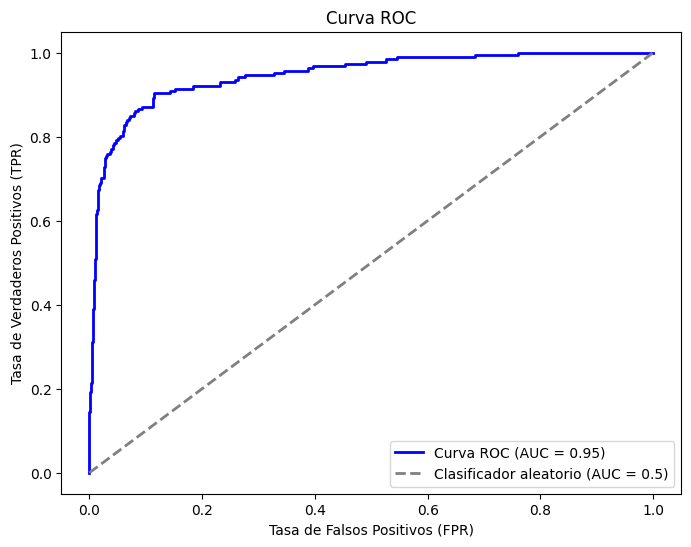

In [356]:
y_score = modelo.predict_proba(Xv)[:, 1]
fpr, tpr, thresholds = roc_curve(yv, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Clasificador aleatorio (AUC = 0.5)')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Finalmente, para una comprobación gráfica, decidí utilizar la curva ROC junto con el área bajo la curva (AUC), la cual es de 0.97. Este valor es bastante similar a los resultados obtenidos tanto en la evaluación del modelo como en la validación cruzada (cross-validation).

## Notas del modelo

A pesar de que el modelo mostró un comportamiento aparentemente bueno en términos de métricas de evaluación, como el score de ROC-AUC, se identificó un problema importante durante el proceso de creación de los bins para las variables. Al discretizar las variables en intervalos (bins), algunos valores no quedaban incluidos en ciertos rangos, lo que generaba valores NaN en las categorías correspondientes.Inicialmente, se decidió eliminar los outliers con el objetivo de reducir la aparición de valores NaN. Sin embargo, incluso después de esta limpieza, persistía un número significativo de valores faltantes en las categorías de algunas variables. Esto tuvo un impacto directo en el entrenamiento del modelo, ya que las columnas con valores NaN se eliminaban automáticamente, lo que reducía considerablemente el número de variables disponibles para el modelo. Como consecuencia, el score de ROC-AUC obtenido fue bajo (alrededor de 0.6)
Para abordar este problema, se optó por utilizar la función fillna para imputar los valores faltantes con 0. Esta decisión permitió conservar todas las variables creadas y entrenar el modelo con un conjunto de datos completo. Como resultado, el score de ROC-AUC mejoró significativamente, alcanzando valores mucho más altos. Sin embargo, este enfoque plantea una preocupacion: Al reemplazar los valores NaN con 0, se está asumiendo que las categorías sin observaciones no tienen poder predictivo lo que puede verse como una manipulacion de los datos.

## Coeficientes

In [357]:
betas = list(modelo.coef_[0])
alpha = modelo.intercept_[0]

In [358]:
betas

[np.float64(-0.5459780753871256),
 np.float64(-0.4908616465046123),
 np.float64(-0.7794637025697162),
 np.float64(-0.4944966424661283),
 np.float64(-0.6149947144331734),
 np.float64(-0.48729941517600045),
 np.float64(0.10424638243024642),
 np.float64(-0.0942087748238335),
 np.float64(-0.7076353911618989),
 np.float64(-0.33148295932927985),
 np.float64(-1.226263651680681),
 np.float64(-0.421240635786998),
 np.float64(-0.4341968593871542),
 np.float64(-1.3042315068423018),
 np.float64(-0.8266460417880444)]

In [359]:
alpha

np.float64(-2.374869290413475)

## Score

In [360]:
PDO        = 30  #Puntos para duplicar las probabilidades
base_odds  = 10 #"varianza"
base_score = 300 #"media"

factor = PDO/np.log(2) #Logaritmo de dos porque son dos clases
offset = base_score-factor*np.log(base_odds)
n      = len(varw)

In [361]:
for k,v in enumerate(X.columns.tolist()):
    df_mf['P_%s'%v[2:]] = ((df_mf[v]*-betas[k]+alpha/n)*factor+offset/n).astype(int)

In [362]:
df_mf

PC3               PC2             PC11               PC9  \
0     (-3.936, -1.522]     (2.68, 4.524]   (1.194, 2.265]  (-1.286, 0.0708]   
1      (-1.522, 0.891]  (-2.852, -1.008]  (-0.947, 0.124]   (0.0708, 1.428]   
2     (-3.936, -1.522]     (2.68, 4.524]   (0.124, 1.194]    (1.428, 2.785]   
3      (-8.779, -6.35]     (2.68, 4.524]   (0.124, 1.194]  (-1.286, 0.0708]   
4      (-8.779, -6.35]     (0.836, 2.68]   (1.194, 2.265]  (-1.286, 0.0708]   
...                ...               ...              ...               ...   
6866  (-3.936, -1.522]     (0.836, 2.68]  (-0.947, 0.124]   (0.0708, 1.428]   
6867  (-3.936, -1.522]     (2.68, 4.524]   (0.124, 1.194]  (-1.286, 0.0708]   
6868   (-6.35, -3.936]     (2.68, 4.524]   (0.124, 1.194]  (-1.286, 0.0708]   
6869    (0.891, 3.305]  (-2.852, -1.008]   (1.194, 2.265]  (-1.286, 0.0708]   
6870   (-8.779, -6.35]     (0.836, 2.68]   (1.194, 2.265]  (-1.286, 0.0708]   

                 PC17              PC20               PC1              PC13  \
0     (-1.347, 0.154]   (-0.569, 0.395]    (3.713, 5.378]    (0.227, 1.131]   
1      (0.154, 1.656]   (-0.569, 0.395]  (-2.949, -1.284]    (0.227, 1.131]   
2     (-1.347, 0.154]   (-0.569, 0.395]    (7.044, 8.709]   (-0.678, 0.227]   
3     (-1.347, 0.154]   (-0.569, 0.395]    (2.047, 3.713]    (2.035, 2.939]   
4     (-1.347, 0.154]   (-0.569, 0.395]    (0.382, 2.047]    (1.131, 2.035]   
...               ...               ...               ...               ...   
6866  (-1.347, 0.154]    (0.395, 1.359]  (-2.949, -1.284]  (-1.582, -0.678]   
6867  (-1.347, 0.154]  (-1.532, -0.569]    (2.047, 3.713]    (1.131, 2.035]   
6868  (-1.347, 0.154]   (-0.569, 0.395]    (3.713, 5.378]    (1.131, 2.035]   
6869   (0.154, 1.656]  (-1.532, -0.569]   (-1.284, 0.382]    (0.227, 1.131]   
6870  (-1.347, 0.154]   (-0.569, 0.395]    (0.382, 2.047]    (1.131, 2.035]   

                   PC6              PC15              PC12              PC10  \
0     (-1.288, 0.0483]  (-1.927, -0.128]    (1.037, 2.217]     (0.69, 3.025]   
1      (0.0483, 1.385]  (-1.927, -0.128]    (1.037, 2.217]    (-1.646, 0.69]   
2     (-1.288, 0.0483]   (-0.128, 1.671]  (-1.322, -0.143]    (-1.646, 0.69]   
3       (1.385, 2.721]  (-1.927, -0.128]   (-0.143, 1.037]     (0.69, 3.025]   
4     (-1.288, 0.0483]   (-0.128, 1.671]  (-1.322, -0.143]     (0.69, 3.025]   
...                ...               ...               ...               ...   
6866   (0.0483, 1.385]  (-3.735, -1.927]  (-1.322, -0.143]  (-3.991, -1.646]   
6867  (-1.288, 0.0483]  (-1.927, -0.128]    (1.037, 2.217]     (0.69, 3.025]   
6868    (1.385, 2.721]  (-1.927, -0.128]  (-1.322, -0.143]    (-1.646, 0.69]   
6869   (0.0483, 1.385]   (-0.128, 1.671]   (-0.143, 1.037]  (-3.991, -1.646]   
6870  (-1.288, 0.0483]   (-0.128, 1.671]  (-1.322, -0.143]     (0.69, 3.025]   

                   PC4               PC7               PC8  y     W_PC3  \
0     (-1.507, -0.174]  (-1.211, 0.0849]  (-1.732, -0.246]  1 -1.195525   
1       (-0.174, 1.16]  (-3.803, -2.507]  (-3.219, -1.732]  1  0.786318   
2     (-2.841, -1.507]  (-2.507, -1.211]    (1.241, 2.727]  1 -1.195525   
3     (-1.507, -0.174]  (-2.507, -1.211]   (-0.246, 1.241]  1 -3.300040   
4       (-0.174, 1.16]  (-2.507, -1.211]   (-0.246, 1.241]  1 -3.300040   
...                ...               ...               ... ..       ...   
6866     (1.16, 2.494]  (-2.507, -1.211]   (-0.246, 1.241]  1 -1.195525   
6867    (-0.174, 1.16]  (-1.211, 0.0849]   (-0.246, 1.241]  1 -1.195525   
6868  (-1.507, -0.174]  (-2.507, -1.211]   (-0.246, 1.241]  1 -1.551876   
6869    (-0.174, 1.16]  (-1.211, 0.0849]   (-0.246, 1.241]  1  2.217588   
6870    (-0.174, 1.16]  (-2.507, -1.211]   (-0.246, 1.241]  1 -3.300040   

         W_PC2    W_PC11     W_PC9    W_PC17    W_PC20     W_PC1    W_PC13  \
0    -1.388282 -1.246045  0.151347 -0.560874 -0.139218 -0.138386  0.224592   
1     2.151195  1.036746  0.091806  1.511405 -0.139218  0.928678  0.224592   
2    -1.388282 -0.090578 

In [363]:
varp = [v for v in df_mf.columns if v[:2]=='P_']

In [364]:
varp

['P_PC3',
 'P_PC2',
 'P_PC11',
 'P_PC9',
 'P_PC17',
 'P_PC20',
 'P_PC1',
 'P_PC13',
 'P_PC6',
 'P_PC15',
 'P_PC12',
 'P_PC10',
 'P_PC4',
 'P_PC7',
 'P_PC8']

In [365]:
df_mf['score'] = df_mf[varp].sum(axis=1)

In [366]:
df_mf

PC3               PC2             PC11               PC9  \
0     (-3.936, -1.522]     (2.68, 4.524]   (1.194, 2.265]  (-1.286, 0.0708]   
1      (-1.522, 0.891]  (-2.852, -1.008]  (-0.947, 0.124]   (0.0708, 1.428]   
2     (-3.936, -1.522]     (2.68, 4.524]   (0.124, 1.194]    (1.428, 2.785]   
3      (-8.779, -6.35]     (2.68, 4.524]   (0.124, 1.194]  (-1.286, 0.0708]   
4      (-8.779, -6.35]     (0.836, 2.68]   (1.194, 2.265]  (-1.286, 0.0708]   
...                ...               ...              ...               ...   
6866  (-3.936, -1.522]     (0.836, 2.68]  (-0.947, 0.124]   (0.0708, 1.428]   
6867  (-3.936, -1.522]     (2.68, 4.524]   (0.124, 1.194]  (-1.286, 0.0708]   
6868   (-6.35, -3.936]     (2.68, 4.524]   (0.124, 1.194]  (-1.286, 0.0708]   
6869    (0.891, 3.305]  (-2.852, -1.008]   (1.194, 2.265]  (-1.286, 0.0708]   
6870   (-8.779, -6.35]     (0.836, 2.68]   (1.194, 2.265]  (-1.286, 0.0708]   

                 PC17              PC20               PC1              PC13  \
0     (-1.347, 0.154]   (-0.569, 0.395]    (3.713, 5.378]    (0.227, 1.131]   
1      (0.154, 1.656]   (-0.569, 0.395]  (-2.949, -1.284]    (0.227, 1.131]   
2     (-1.347, 0.154]   (-0.569, 0.395]    (7.044, 8.709]   (-0.678, 0.227]   
3     (-1.347, 0.154]   (-0.569, 0.395]    (2.047, 3.713]    (2.035, 2.939]   
4     (-1.347, 0.154]   (-0.569, 0.395]    (0.382, 2.047]    (1.131, 2.035]   
...               ...               ...               ...               ...   
6866  (-1.347, 0.154]    (0.395, 1.359]  (-2.949, -1.284]  (-1.582, -0.678]   
6867  (-1.347, 0.154]  (-1.532, -0.569]    (2.047, 3.713]    (1.131, 2.035]   
6868  (-1.347, 0.154]   (-0.569, 0.395]    (3.713, 5.378]    (1.131, 2.035]   
6869   (0.154, 1.656]  (-1.532, -0.569]   (-1.284, 0.382]    (0.227, 1.131]   
6870  (-1.347, 0.154]   (-0.569, 0.395]    (0.382, 2.047]    (1.131, 2.035]   

                   PC6              PC15              PC12              PC10  \
0     (-1.288, 0.0483]  (-1.927, -0.128]    (1.037, 2.217]     (0.69, 3.025]   
1      (0.0483, 1.385]  (-1.927, -0.128]    (1.037, 2.217]    (-1.646, 0.69]   
2     (-1.288, 0.0483]   (-0.128, 1.671]  (-1.322, -0.143]    (-1.646, 0.69]   
3       (1.385, 2.721]  (-1.927, -0.128]   (-0.143, 1.037]     (0.69, 3.025]   
4     (-1.288, 0.0483]   (-0.128, 1.671]  (-1.322, -0.143]     (0.69, 3.025]   
...                ...               ...               ...               ...   
6866   (0.0483, 1.385]  (-3.735, -1.927]  (-1.322, -0.143]  (-3.991, -1.646]   
6867  (-1.288, 0.0483]  (-1.927, -0.128]    (1.037, 2.217]     (0.69, 3.025]   
6868    (1.385, 2.721]  (-1.927, -0.128]  (-1.322, -0.143]    (-1.646, 0.69]   
6869   (0.0483, 1.385]   (-0.128, 1.671]   (-0.143, 1.037]  (-3.991, -1.646]   
6870  (-1.288, 0.0483]   (-0.128, 1.671]  (-1.322, -0.143]     (0.69, 3.025]   

                   PC4               PC7               PC8  y     W_PC3  \
0     (-1.507, -0.174]  (-1.211, 0.0849]  (-1.732, -0.246]  1 -1.195525   
1       (-0.174, 1.16]  (-3.803, -2.507]  (-3.219, -1.732]  1  0.786318   
2     (-2.841, -1.507]  (-2.507, -1.211]    (1.241, 2.727]  1 -1.195525   
3     (-1.507, -0.174]  (-2.507, -1.211]   (-0.246, 1.241]  1 -3.300040   
4       (-0.174, 1.16]  (-2.507, -1.211]   (-0.246, 1.241]  1 -3.300040   
...                ...               ...               ... ..       ...   
6866     (1.16, 2.494]  (-2.507, -1.211]   (-0.246, 1.241]  1 -1.195525   
6867    (-0.174, 1.16]  (-1.211, 0.0849]   (-0.246, 1.241]  1 -1.195525   
6868  (-1.507, -0.174]  (-2.507, -1.211]   (-0.246, 1.241]  1 -1.551876   
6869    (-0.174, 1.16]  (-1.211, 0.0849]   (-0.246, 1.241]  1  2.217588   
6870    (-0.174, 1.16]  (-2.507, -1.211]   (-0.246, 1.241]  1 -3.300040   

         W_PC2    W_PC11     W_PC9    W_PC17    W_PC20     W_PC1    W_PC13  \
0    -1.388282 -1.246045  0.151347 -0.560874 -0.139218 -0.138386  0.224592   
1     2.151195  1.036746  0.091806  1.511405 -0.139218  0.928678  0.224592   
2    -1.388282 -0.090578 

<Axes: >

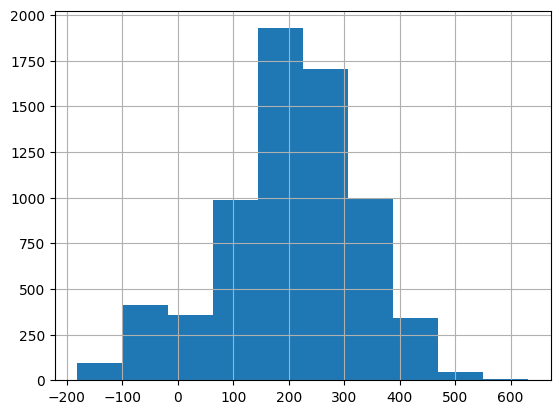

In [367]:
df_mf['score'].hist()

In [368]:
df_mf['score'].describe()

count    6871.000000
mean      203.671664
std       126.527835
min      -181.000000
25%       137.000000
50%       213.000000
75%       287.000000
max       632.000000
Name: score, dtype: float64

In [369]:
for v in X.columns.tolist():    
    display(df_mf[['P_'+v[2:],v[2:]]].groupby(v[2:]).max().reset_index())

PC3  P_PC3
0   (-1.522, 0.891]     25
1  (-3.936, -1.522]    -21
2   (-6.35, -3.936]    -30
3   (-8.779, -6.35]    -71
4    (0.891, 3.305]     58
5    (3.305, 5.719]      6

PC2  P_PC2
0   (-1.008, 0.836]     30
1  (-2.852, -1.008]     52
2  (-4.711, -2.852]      6
3     (0.836, 2.68]     -9
4     (2.68, 4.524]    -22
5    (4.524, 6.368]      6
6    (6.368, 8.212]      6
7   (8.212, 10.056]      6

PC11  P_PC11
0   (-0.947, 0.124]      41
1  (-2.018, -0.947]     141
2  (-3.088, -2.018]       6
3  (-4.168, -3.088]       6
4    (0.124, 1.194]       3
5    (1.194, 2.265]     -35
6    (2.265, 3.336]     -17
7    (3.336, 4.406]       6

PC9  P_PC9
0  (-1.286, 0.0708]      9
1  (-2.643, -1.286]     79
2    (-4.0, -2.643]      6
3    (-5.367, -4.0]      6
4   (0.0708, 1.428]      8
5    (1.428, 2.785]    -10
6    (2.785, 4.141]    -34

PC17  P_PC17
0   (-1.347, 0.154]      -8
1  (-2.858, -1.347]      23
2    (0.154, 1.656]      46
3    (1.656, 3.158]       6
4     (3.158, 4.66]       6

PC20  P_PC20
0   (-0.569, 0.395]       3
1  (-1.532, -0.569]     -11
2  (-2.496, -1.532]       6
3  (-3.468, -2.496]       6
4    (0.395, 1.359]      54
5    (1.359, 2.323]       6
6    (2.323, 3.287]       6

PC1  P_PC1
0   (-1.284, 0.382]      5
1  (-2.949, -1.284]      2
2  (-4.615, -2.949]     -8
3  (-6.296, -4.615]      6
4    (0.382, 2.047]      9
5    (2.047, 3.713]      9
6    (3.713, 5.378]      7
7    (5.378, 7.044]      8
8    (7.044, 8.709]      8

PC13  P_PC13
0   (-0.678, 0.227]       7
1  (-1.582, -0.678]       6
2  (-2.486, -1.582]      19
3   (-3.39, -2.486]       6
4   (-4.294, -3.39]       6
5  (-5.208, -4.294]       6
6    (0.227, 1.131]       7
7    (1.131, 2.035]       2
8    (2.035, 2.939]       0

PC6  P_PC6
0  (-1.288, 0.0483]     19
1  (-2.624, -1.288]    126
2  (-3.961, -2.624]      6
3  (-5.309, -3.961]      6
4   (0.0483, 1.385]     -3
5    (1.385, 2.721]    -21
6    (2.721, 4.057]     29
7    (4.057, 5.394]      6

PC15  P_PC15
0   (-0.128, 1.671]      18
1  (-1.927, -0.128]      -1
2  (-3.735, -1.927]       8
3    (1.671, 3.469]       6
4    (3.469, 5.268]       6

PC12  P_PC12
0               (-0.143, 1.037]      12
1              (-1.322, -0.143]      24
2              (-2.502, -1.322]      52
3              (-3.682, -2.502]       6
4  (-4.872000000000001, -3.682]       6
5                (1.037, 2.217]     -35
6                (2.217, 3.397]     -31
7                (3.397, 4.577]       6

PC10  P_PC10
0    (-1.646, 0.69]      10
1  (-3.991, -1.646]      25
2     (0.69, 3.025]      -2
3    (3.025, 5.361]     -13

PC4  P_PC4
0                (-0.174, 1.16]      9
1              (-1.507, -0.174]     -6
2              (-2.841, -1.507]      2
3  (-4.188000000000001, -2.841]     54
4                 (1.16, 2.494]     35
5                (2.494, 3.827]     47
6                (3.827, 5.161]      6
7                (5.161, 6.495]      6
8                (6.495, 7.828]      6

PC7  P_PC7
0              (-1.211, 0.0849]     19
1              (-2.507, -1.211]    -26
2              (-3.803, -2.507]    101
3  (-5.111000000000001, -3.803]      6
4               (0.0849, 1.381]      0
5                (1.381, 2.677]      5
6                (2.677, 3.973]      6
7                (3.973, 5.269]      6

PC8  P_PC8
0                (-0.246, 1.241]    -17
1               (-1.732, -0.246]     28
2               (-3.219, -1.732]     58
3  (-4.7170000000000005, -3.219]      6
4                 (1.241, 2.727]     52
5                 (2.727, 4.214]      6
6                   (4.214, 5.7]      6

## Credit Scoring

In [370]:
df_mf['r_score'] = pd.cut(df_mf['score'],bins=4,include_lowest=True).astype(str)

In [371]:
aux     = df_mf[['r_score','y']].copy()
aux['n']= 1

In [372]:
aux= aux.pivot_table(index='r_score',columns='y',values='n',aggfunc='sum').reset_index().sort_values(by='r_score')

In [373]:
aux = aux.fillna(0)

In [374]:
aux

y            r_score       0      1
0  (-181.814, 22.25]   173.0  486.0
1     (22.25, 225.5]  2989.0  130.0
2    (225.5, 428.75]  2896.0    8.0
3    (428.75, 632.0]   189.0    0.0

## Guardado de variables 

In [375]:
aux.reset_index().sort_values(by='r_score',ascending=False).to_excel('SCORE_PHRH_.xlsx') # Scorecard

In [381]:
df_mf[varw].to_csv('Variables_Con_Woe.csv') # Variables con Woe

In [382]:
df_sin_woe.to_csv('Variables_Originales.csv') # Variables antes de Woe

In [386]:
df_mf.to_csv('Df_Completo_modelo.csv') # Variables con Woe y puntos

## Guardado de Modelo y objetos

In [379]:
with open ('Modelo_P1_Credit_Scoring.pkl', 'wb') as archivo:
    pck.dump(modelo,archivo)

In [380]:
jlb.dump(sc, "scaler.pkl")
jlb.dump(pca, "pca.pkl")
jlb.dump(smote, "smote.pkl")

['smote.pkl']

## Evaluacion 

In [410]:
df_val = Xv.copy() # Set de validacion

In [411]:
df_val['y'] = yv

In [412]:
df_val

W_PC3     W_PC2    W_PC11     W_PC9    W_PC17    W_PC20     W_PC1  \
3308  0.786318  1.133058  0.000000  0.151347 -0.560874 -0.139218 -0.445989   
2794  0.786318  1.133058  4.009842 -0.786820  1.511405 -0.139218 -0.615449   
5190  0.786318  1.133058 -0.090578  0.091806 -0.560874  2.259484  0.928678   
6163  2.217588 -1.388282 -0.090578  0.151347  1.511405  0.000000  0.300278   
5935  2.217588  2.151195 -0.090578 -1.931031 -0.560874 -0.139218  0.300278   
...        ...       ...       ...       ...       ...       ...       ...   
3024  0.786318  1.133058  1.036746  3.418789 -0.560874  2.259484 -0.445989   
502   0.786318 -0.733234  0.000000  0.151347  1.511405 -0.139218  3.241471   
5209  2.217588  1.133058 -0.090578  0.091806  1.511405  2.259484 -0.722770   
5848  0.786318  2.151195 -1.246045  0.151347 -0.560874  0.000000  0.300278   
5892  0.786318  2.151195 -0.090578  0.091806  0.625581 -0.139218  0.928678   

        W_PC13     W_PC6    W_PC15    W_PC12    W_PC10     W_PC4     W_PC7  \
3308  0.224592  3.927759  0.840127  0.113378  0.229114  1.535746  0.223370   
2794  0.224592 -0.328054 -0.553234 -0.792033 -0.495096 -0.669345 -0.012817   
5190  3.076191 -0.328054 -0.553234 -0.792033  1.030480  1.535746  0.223370   
6163  0.224592  0.429622 -0.553234  0.335351  0.229114  2.548324 -0.012817   
5935  0.224592  3.927759  0.840127  0.335351  1.030480  0.168736 -0.012817   
...        ...       ...       ...       ...       ...       ...       ...   
3024  0.342589  0.000000 -0.553234  0.872958  1.030480 -0.669345 -0.101662   
502   0.224592  0.429622  0.840127  0.113378 -0.495096 -0.237923  0.223370   
5209  0.014383 -0.328054 -0.553234  0.872958 -0.495096  0.168736  1.685278   
5848  3.076191 -0.328054  0.840127 -0.792033 -0.495096  1.535746 -0.101662   
5892  0.014383  0.429622 -0.553234  0.113378  0.229114 -0.669345  0.223370   

         W_PC8  y  
3308 -0.681925  0  
2794  1.286733  0  
5190 -0.681925  0  
6163  0.613841  0  
5935 -0.681925  0  
...        ... ..  
3024  1.286733  0  
502   0.613841  0  
5209  1.286733  0  
5848  0.613841  0  
5892  1.459430  0  

[2062 rows x 16 columns]

In [448]:
Xv_sam = Xv.sample(10)

In [449]:
Xv_sam

W_PC3     W_PC2    W_PC11     W_PC9    W_PC17    W_PC20     W_PC1  \
460   2.217588 -0.733234 -1.246045  0.000000 -0.560874 -0.139218 -0.722770   
5449  2.217588  2.151195  1.036746  0.151347 -0.560874 -0.139218 -0.615449   
6175  2.217588  1.133058 -0.090578  0.151347 -0.560874 -0.857013  0.300278   
4848  0.786318  1.133058 -1.246045 -0.786820 -0.560874 -0.139218  0.928678   
4533  2.217588  2.151195  4.009842 -0.786820  1.511405 -0.139218 -0.615449   
2717  0.786318  1.133058 -0.090578  0.151347 -0.560874  2.259484  3.241471   
6488 -1.195525 -0.733234  1.036746 -1.931031  1.511405 -0.857013 -0.615449   
4199  2.217588 -0.733234  4.009842  3.418789  1.511405  2.259484  0.928678   
4950  0.786318  2.151195 -0.090578 -0.786820  1.511405 -0.139218  0.300278   
6793 -1.195525 -0.733234 -1.246045 -0.786820 -0.560874 -0.857013 -0.615449   

        W_PC13     W_PC6    W_PC15    W_PC12    W_PC10     W_PC4     W_PC7  \
460   3.076191  3.927759 -0.553234 -0.792033  1.030480 -0.669345 -0.012817   
5449 -0.865904  0.429622 -0.553234  0.335351 -0.495096  2.196103 -0.012817   
6175  0.224592 -0.328054 -0.553234  0.113378  0.229114  1.535746 -0.101662   
4848  0.014383  0.429622 -0.553234 -0.792033  0.229114 -0.669345 -0.101662   
4533  0.342589 -0.328054 -0.553234  0.872958  1.030480 -0.669345  0.223370   
2717  0.014383  0.429622 -0.553234  0.113378  0.229114  0.168736 -0.101662   
6488 -0.865904 -0.906112 -0.553234 -0.718561 -0.495096 -0.669345  0.223370   
4199  0.224592 -0.328054 -0.553234  0.335351 -0.495096 -0.237923 -0.101662   
4950  0.342589 -0.328054  0.840127  0.335351  0.229114  2.196103  1.685278   
6793 -0.865904 -0.328054 -0.553234  0.113378  0.229114 -0.237923 -0.101662   

         W_PC8  
460   0.613841  
5449 -0.681925  
6175 -0.681925  
4848  0.613841  
4533  1.286733  
2717 -0.681925  
6488 -0.681925  
4199 -0.681925  
4950  0.613841  
6793 -0.681925

In [435]:
with open('Modelo_P1_Credit_Scoring.pkl', 'rb') as archivo:
    Model = pck.load(archivo)

In [450]:
Predicciones = Model.predict(Xv_sam)

In [451]:
Predicciones

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [452]:
index_sam = Xv_sam.index

In [453]:
index_sam

Index([460, 5449, 6175, 4848, 4533, 2717, 6488, 4199, 4950, 6793], dtype='int64')

In [454]:
df_val.loc[index_sam, 'y'] # Podemos ver que el modelo detecto correctamente los caso de fraude del test de validacion

460     0
5449    0
6175    0
4848    0
4533    0
2717    0
6488    1
4199    0
4950    0
6793    1
Name: y, dtype: int64

In [455]:
df_mf.iloc[index_sam]

PC3               PC2              PC11               PC9  \
460     (0.891, 3.305]     (0.836, 2.68]    (1.194, 2.265]    (-4.0, -2.643]   
5449    (0.891, 3.305]  (-2.852, -1.008]   (-0.947, 0.124]  (-1.286, 0.0708]   
6175    (0.891, 3.305]   (-1.008, 0.836]    (0.124, 1.194]  (-1.286, 0.0708]   
4848   (-1.522, 0.891]   (-1.008, 0.836]    (1.194, 2.265]    (1.428, 2.785]   
4533    (0.891, 3.305]  (-2.852, -1.008]  (-2.018, -0.947]    (1.428, 2.785]   
2717   (-1.522, 0.891]   (-1.008, 0.836]    (0.124, 1.194]  (-1.286, 0.0708]   
6488  (-3.936, -1.522]     (0.836, 2.68]   (-0.947, 0.124]    (2.785, 4.141]   
4199    (0.891, 3.305]     (0.836, 2.68]  (-2.018, -0.947]  (-2.643, -1.286]   
4950   (-1.522, 0.891]  (-2.852, -1.008]    (0.124, 1.194]    (1.428, 2.785]   
6793  (-3.936, -1.522]     (0.836, 2.68]    (1.194, 2.265]    (1.428, 2.785]   

                 PC17              PC20               PC1              PC13  \
460   (-1.347, 0.154]   (-0.569, 0.395]    (2.047, 3.713]  (-2.486, -1.582]   
5449  (-1.347, 0.154]   (-0.569, 0.395]    (0.382, 2.047]    (1.131, 2.035]   
6175  (-1.347, 0.154]  (-1.532, -0.569]   (-1.284, 0.382]    (0.227, 1.131]   
4848  (-1.347, 0.154]   (-0.569, 0.395]  (-2.949, -1.284]  (-1.582, -0.678]   
4533   (0.154, 1.656]   (-0.569, 0.395]    (0.382, 2.047]   (-0.678, 0.227]   
2717  (-1.347, 0.154]    (0.395, 1.359]  (-4.615, -2.949]  (-1.582, -0.678]   
6488   (0.154, 1.656]  (-1.532, -0.569]    (0.382, 2.047]    (1.131, 2.035]   
4199   (0.154, 1.656]    (0.395, 1.359]  (-2.949, -1.284]    (0.227, 1.131]   
4950   (0.154, 1.656]   (-0.569, 0.395]   (-1.284, 0.382]   (-0.678, 0.227]   
6793  (-1.347, 0.154]  (-1.532, -0.569]    (0.382, 2.047]    (1.131, 2.035]   

                   PC6              PC15              PC12              PC10  \
460   (-2.624, -1.288]  (-1.927, -0.128]    (1.037, 2.217]  (-3.991, -1.646]   
5449  (-1.288, 0.0483]  (-1.927, -0.128]  (-1.322, -0.143]     (0.69, 3.025]   
6175   (0.0483, 1.385]  (-1.927, -0.128]   (-0.143, 1.037]    (-1.646, 0.69]   
4848  (-1.288, 0.0483]  (-1.927, -0.128]    (1.037, 2.217]    (-1.646, 0.69]   
4533   (0.0483, 1.385]  (-1.927, -0.128]  (-2.502, -1.322]  (-3.991, -1.646]   
2717  (-1.288, 0.0483]  (-1.927, -0.128]   (-0.143, 1.037]    (-1.646, 0.69]   
6488    (1.385, 2.721]  (-1.927, -0.128]    (2.217, 3.397]     (0.69, 3.025]   
4199   (0.0483, 1.385]  (-1.927, -0.128]  (-1.322, -0.143]     (0.69, 3.025]   
4950   (0.0483, 1.385]   (-0.128, 1.671]  (-1.322, -0.143]    (-1.646, 0.69]   
6793   (0.0483, 1.385]  (-1.927, -0.128]   (-0.143, 1.037]    (-1.646, 0.69]   

                   PC4               PC7               PC8  y     W_PC3  \
460   (-1.507, -0.174]    (1.381, 2.677]  (-1.732, -0.246]  0  2.217588   
5449    (2.494, 3.827]    (1.381, 2.677]   (-0.246, 1.241]  0  2.217588   
6175     (1.16, 2.494]   (0.0849, 1.381]   (-0.246, 1.241]  0  2.217588   
4848  (-1.507, -0.174]   (0.0849, 1.381]  (-1.732, -0.246]  0  0.786318   
4533  (-1.507, -0.174]  (-1.211, 0.0849]    (1.241, 2.727]  0  2.217588   
2717    (-0.174, 1.16]   (0.0849, 1.381]   (-0.246, 1.241]  0  0.786318   
6488  (-1.507, -0.174]  (-1.211, 0.0849]   (-0.246, 1.241]  1 -1.195525   
4199  (-2.841, -1.507]   (0.0849, 1.381]   (-0.246, 1.241]  0  2.217588   
4950    (2.494, 3.827]  (-3.803, -2.507]  (-1.732, -0.246]  0  0.786318   
6793  (-2.841, -1.507]   (0.0849, 1.381]   (-0.246, 1.241]  1 -1.195525   

         W_PC2    W_PC11     W_PC9    W_PC17    W_PC20     W_PC1    W_PC13  \
460  -0.733234 -1.246045  0.000000 -0.560874 -0.139218 -0.722770  3.076191   
5449  2.151195  1.036746  0.151347 -0.560874 -0.139218 -0.615449 -0.865904   
6175  1.133058 -0.090578  0.151347 -0.560874 -0.857013  0.300278  0.224592   
4848  1.133058 -1.246045 -0.786820 -0.560874 -0.139218  0.928678  0.014383   
4533  2.151195  4.009842 -0.786820  1.511405 -0.139218 -0.615449  0.342589   
2717  1.133058 -0.090578  0.151347 -0.560874  2.259484  3.241471  0.014383   
6488 -0.733234 

In [456]:
aux

y            r_score       0      1
0  (-181.814, 22.25]   173.0  486.0
1     (22.25, 225.5]  2989.0  130.0
2    (225.5, 428.75]  2896.0    8.0
3    (428.75, 632.0]   189.0    0.0

Comparando los resultados con la ScoreCard, observamos que en los cuatro primeros casos y el sexto, las predicciones cayeron en el segundo bin. En este bin, el 95% de los registros corresponden a la clase 0, lo que indica que es altamente probable que estos casos no sean fraude.

Para el quinto registro, la predicción cayó en el último bin, que en nuestro caso de estudio no contiene casos de fraude. Esto sugiere que, según nuestro modelo, este registro es seguro y no representa un fraude.

Por otro lado, los únicos dos valores positivos se encuentran en el primer bin, donde el 73% de los casos corresponden a fraudes. Esto indica que el modelo clasificó correctamente estos registros como fraude.

Finalmente, las otras dos predicciones se ubicaron en el penúltimo bin, donde la proporción de casos positivos es de 0.002. Dado que este valor es extremadamente bajo, es poco probable que estos registros sean fraudulentos, por lo que también fueron correctamente clasificados como no fraude.